Import Libararies

In [1514]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

### 1. Load Data Set

#### 1.1 Crime Dataset

In [1515]:

df_crime_data = pd.read_csv('crime_dataset.csv')
df_crime_data.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,modus_operandi,victim_age,...,crime_code_1,crime_code_2,crime_code_3,crime_code_4,incident_admincode,location,cross_street,latitude,longitude,case_solved
0,211414090,2021-06-27,2021-06-20 20:00:00,14,Pacific,1464,1,480,0344,32.0,...,480.0,NaN,NaN,NaN,0,12400 FIELDING,NaN,33.9791,-118.4092,Not solved
1,210504861,2021-01-22,2021-01-21 22:00:00,5,Harbor,515,1,510,NaN,0.0,...,510.0,NaN,NaN,NaN,1,1500 BAY VIEW AV,NaN,33.7929,-118.2710,Solved
2,210104843,2021-01-21,2021-01-21 02:00:00,1,Central,139,1,510,NaN,0.0,...,510.0,NaN,NaN,NaN,1,300 S SANTA FE AV,NaN,34.0420,-118.2326,Solved
3,210115564,2021-08-22,2021-08-22 07:00:00,1,Central,151,1,350,1308 0344 0345 1822,29.0,...,350.0,NaN,NaN,NaN,0,7TH,FIGUEROA,34.0496,-118.2603,Not solved
4,211421187,2021-11-09,2021-11-07 19:00:00,14,Pacific,1465,1,510,NaN,0.0,...,510.0,NaN,NaN,NaN,0,5500 MESMER AV,NaN,33.9869,-118.4022,Not solved


In [1516]:
df_crime_data.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'modus_operandi', 'victim_age', 'victim_gender', 'victim_ethnicity',
       'premise_code', 'premise_description', 'weapon_code', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'incident_admincode',
       'location', 'cross_street', 'latitude', 'longitude', 'case_solved'],
      dtype='object')

In [1517]:
df_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203089 entries, 0 to 203088
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   division_number      203089 non-null  int64  
 1   date_reported        203089 non-null  object 
 2   date_occurred        203089 non-null  object 
 3   area                 203089 non-null  int64  
 4   area_name            203089 non-null  object 
 5   reporting_district   203089 non-null  int64  
 6   part                 203089 non-null  int64  
 7   crime_code           203089 non-null  int64  
 8   modus_operandi       174160 non-null  object 
 9   victim_age           199027 non-null  float64
 10  victim_gender        175360 non-null  object 
 11  victim_ethnicity     175358 non-null  object 
 12  premise_code         203086 non-null  float64
 13  premise_description  202997 non-null  object 
 14  weapon_code          71246 non-null   float64
 15  crime_code_1     

In [1518]:
df_crime_data.describe()

,division_number,area,reporting_district,part,crime_code,victim_age,premise_code,weapon_code,crime_code_1,crime_code_2,crime_code_3,crime_code_4,incident_admincode,latitude,longitude
count,2.030890e+05,203089.000000,203089.000000,203089.000000,203089.000000,199027.000000,203086.000000,71246.000000,203087.000000,15850.000000,529.000000,18.000000,203089.000000,203089.000000,203089.000000
mean,2.111349e+08,10.751075,1121.524189,1.405118,504.364879,29.963553,297.406266,358.930943,504.101818,956.582397,978.476371,993.166667,0.214556,33.826701,-117.499034
std,1.048451e+06,6.061707,606.272483,0.490916,209.716701,21.651435,216.205401,125.633107,209.525038,114.039063,62.925761,20.756997,0.410515,2.888534,10.026599
min,2.113000e+03,1.000000,101.000000,1.000000,110.000000,0.000000,101.000000,101.000000,110.000000,210.000000,434.000000,910.000000,0.000000,0.000000,-118.667300
25%,2.106060e+08,6.000000,628.000000,1.000000,330.000000,12.000000,101.000000,307.000000,330.000000,998.000000,998.000000,998.000000,0.000000,34.011100,-118.429100
50%,2.111112e+08,11.000000,1144.000000,1.000000,480.000000,31.000000,203.000000,400.000000,480.000000,998.000000,998.000000,998.000000,0.000000,34.058100,-118.322500
75%,2.116065e+08,16.000000,1612.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,0.000000,34.161100,-118.274100
max,2.315056e+08,21.000000,2199.000000,2.000000,956.000000,99.000000,971.000000,516.000000,956.000000,999.000000,999.000000,999.000000,1.000000,34.334300,0.000000


Change Dates to Date Data and Float data to int
- Note: This has to process here before handling missing data so that it will not cause conflict

In [1519]:
# 1. Convert date columns to datetime
df_crime_data['date_reported'] = pd.to_datetime(df_crime_data['date_reported'], errors='coerce')
df_crime_data['date_occurred'] = pd.to_datetime(df_crime_data['date_occurred'], errors='coerce')
df_crime_data['victim_age'] = df_crime_data['victim_age'].astype('Int64')
df_crime_data['premise_code'] = df_crime_data['premise_code'].astype('Int64')
df_crime_data['weapon_code'] = df_crime_data['weapon_code'].astype('Int64')  # if not already cleaned

Get Area Description Dictionary from area and area_name

In [1520]:
# Drop rows with missing values in either 'area' or 'area_name', then remove duplicates
area_mapping_df = df_crime_data[['area', 'area_name']].dropna().drop_duplicates()

# Sort by area for neatness (optional)
area_mapping_df = area_mapping_df.sort_values(by='area')

# Convert to dictionary with unique values
area_mapping = dict(zip(area_mapping_df['area'], area_mapping_df['area_name']))

# Optional: extract just the list of unique area names
unique_area_names = list(area_mapping.values())

# Preview
print(area_mapping)
print("Unique area names:", unique_area_names)

{1: 'Central', 2: 'Rampart', 3: 'Southwest', 4: 'Hollenbeck', 5: 'Harbor', 6: 'Hollywood', 7: 'Wilshire', 8: 'West LA', 9: 'Van Nuys', 10: 'West Valley', 11: 'Northeast', 12: '77th Street', 13: 'Newton', 14: 'Pacific', 15: 'N Hollywood', 16: 'Foothill', 17: 'Devonshire', 18: 'Southeast', 19: 'Mission', 20: 'Olympic', 21: 'Topanga'}
Unique area names: ['Central', 'Rampart', 'Southwest', 'Hollenbeck', 'Harbor', 'Hollywood', 'Wilshire', 'West LA', 'Van Nuys', 'West Valley', 'Northeast', '77th Street', 'Newton', 'Pacific', 'N Hollywood', 'Foothill', 'Devonshire', 'Southeast', 'Mission', 'Olympic', 'Topanga']


#### 1.2 Load Crime Type Data

In [1521]:
df_crime_type = pd.read_csv('crime_types.csv')
df_crime_type.head()

,crime_code,crime_description
0,480,BIKE - STOLEN
1,510,VEHICLE - STOLEN
2,350,"THEFT, PERSON"
3,440,THEFT PLAIN - PETTY ($950 & UNDER)
4,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)


In [1522]:
df_crime_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   crime_code         133 non-null    int64 
 1   crime_description  133 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


#### 1.2 Load Weapon Typde Data

In [1523]:
df_weapon_type = pd.read_csv('weapon_types.csv')
df_weapon_type.head()

,weapon_code,weapon_description
0,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
1,500,UNKNOWN WEAPON/OTHER WEAPON
2,102,HAND GUN
3,201,KNIFE WITH BLADE OVER 6 INCHES IN LENGTH
4,107,OTHER FIREARM


In [1524]:
df_weapon_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   weapon_code         73 non-null     int64 
 1   weapon_description  73 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


### 2 Data Cleaning

#### 2.1 Handling Missing Data

In [1525]:
#get null %
null_percent= (df_crime_data.isnull().mean() * 100).round(2)
print(null_percent)

division_number         0.00
date_reported           0.00
date_occurred           0.00
area                    0.00
area_name               0.00
reporting_district      0.00
part                    0.00
crime_code              0.00
modus_operandi         14.24
victim_age              2.00
victim_gender          13.65
victim_ethnicity       13.65
premise_code            0.00
premise_description     0.05
weapon_code            64.92
crime_code_1            0.00
crime_code_2           92.20
crime_code_3           99.74
crime_code_4           99.99
incident_admincode      0.00
location                0.00
cross_street           82.43
latitude                0.00
longitude               0.00
case_solved             0.00
dtype: float64


##### 2.1.1 Check crime_code data

In [1526]:
# value with crime code 2 is not in
# it seems most of the crime code are copied from crime code 1 except when crime_code_1 is empty, crime_code_2 is used
df_temp = df_crime_data[df_crime_data['crime_code_2'].isna()][['crime_code','crime_code_1', 'crime_code_2', 'crime_code_3','crime_code_4']]
print(df_temp.shape)
df_temp.head(10)

(187239, 5)


,crime_code,crime_code_1,crime_code_2,crime_code_3,crime_code_4
0,480,480.0,NaN,NaN,NaN
1,510,510.0,NaN,NaN,NaN
2,510,510.0,NaN,NaN,NaN
3,350,350.0,NaN,NaN,NaN
4,510,510.0,NaN,NaN,NaN
5,510,510.0,NaN,NaN,NaN
6,510,510.0,NaN,NaN,NaN
7,510,510.0,NaN,NaN,NaN
8,510,510.0,NaN,NaN,NaN
9,510,510.0,NaN,NaN,NaN


In [1527]:
df_temp = df_crime_data[df_crime_data['crime_code_3'].notnull()][['crime_code','crime_code_1', 'crime_code_2', 'crime_code_3','crime_code_4']]
print(df_temp.shape)
df_temp.head(10)

(529, 5)


,crime_code,crime_code_1,crime_code_2,crime_code_3,crime_code_4
186,210,210.0,230.0,998.0,NaN
491,761,761.0,930.0,998.0,NaN
1607,210,210.0,230.0,998.0,NaN
1973,761,761.0,930.0,998.0,NaN
2089,210,210.0,910.0,998.0,NaN
2395,627,627.0,930.0,998.0,NaN
3349,230,230.0,930.0,998.0,NaN
3423,761,626.0,761.0,998.0,NaN
4827,761,761.0,930.0,998.0,NaN
5036,624,624.0,740.0,902.0,998.0


In [1528]:
df_temp = df_crime_data[df_crime_data['crime_code_4'].notnull()][['crime_code','crime_code_1', 'crime_code_2', 'crime_code_3','crime_code_4']]
print(df_temp.shape)
df_temp.head(10)

(18, 5)


,crime_code,crime_code_1,crime_code_2,crime_code_3,crime_code_4
5036,624,624.0,740.0,902.0,998.0
5435,815,210.0,236.0,815.0,998.0
34053,210,210.0,230.0,761.0,910.0
45523,122,122.0,210.0,910.0,998.0
50285,121,121.0,812.0,830.0,998.0
61994,236,236.0,434.0,930.0,998.0
62829,230,230.0,250.0,753.0,998.0
70502,354,354.0,649.0,653.0,998.0
72571,110,110.0,230.0,648.0,998.0
85962,761,434.0,626.0,761.0,998.0


In [1529]:
#Check if all values in crime_code from crime data is in crime_code of crime type df
all_present = df_crime_data['crime_code'].isin(df_crime_type['crime_code']).all()
all_present  

True

In [1530]:
#Count total crime type in crime code column
df_crime_data['crime_code'].nunique()

133

In [1531]:
missing = df_crime_data['crime_code'][~df_crime_data['crime_code'].isin(df_crime_type['crime_code'])]
print("Values not in reference column:", missing.unique())

Values not in reference column: []


In [1532]:
diff_rows_crime_1 = df_crime_data[df_crime_data['crime_code'] != df_crime_data['crime_code_1']]
diff_rows_crime_1.shape

(402, 25)

In [1533]:
diff_rows_crime_2 = df_crime_data[df_crime_data['crime_code'] == df_crime_data['crime_code_2']]
diff_rows_crime_2.shape

(400, 25)

In [1534]:
diff_rows_crime_3 = df_crime_data[df_crime_data['crime_code'] == df_crime_data['crime_code_3']]
diff_rows_crime_3.shape

(2, 25)

From the above observation, crime_code_1 to crime_code_4 columns can be dropped for the following reasons
- crime_code is combination of crime_code_1 and crime_code_2 and crime_code_3.
- crime_code_4 information is only 18 rows therefore, insufficient information to be a predictor
- crime_code appears to be a generalized field that captures the relevant or dominant code per case
- The sparse values in crime_code_2–4 add noise and missing values
- Keeping only crime_code reduces complexity and simplifies modeling without losing meaningful data

In [1535]:
# drop crime_code_1 to crime_code_4
df_crime_data.drop(columns=['crime_code_1', 'crime_code_2', 'crime_code_3', 'crime_code_4'], inplace=True)

##### 2.1.2 Weapon Code

In [1536]:
#Check if all values in weapon_code from crime data is in weapon_code in weapon type df
all_present = df_crime_data['weapon_code'].isin(df_weapon_type['weapon_code']).all()
all_present

False

In [1537]:
missing = df_crime_data['weapon_code'][~df_crime_data['weapon_code'].isin(df_weapon_type['weapon_code'])]
print("Values not in reference column:", missing.unique())

Values not in reference column: <IntegerArray>
[<NA>]
Length: 1, dtype: Int64


In [1538]:
#Count total weapon type in weapon_code column
df_crime_data['weapon_code'].nunique()

73

In [1539]:
df_weapon_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   weapon_code         73 non-null     int64 
 1   weapon_description  73 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [1540]:
# missing value % of weapon code
df_crime_data['weapon_code'].isnull().mean()

0.6491882869086952

Even though weapon_code missing data is 64%, weapon_code column cannot be dropped since it is one of the important features.
<br>Therefore, weapon_code missing values will be replaced with 'Unspecified'

In [1541]:
df_crime_data['weapon_code'] = df_crime_data['weapon_code'].apply(lambda x: str(int(x)) if pd.notnull(x) else 'Unspecified')
print(df_crime_data['weapon_code'].isnull().mean())

0.0


In [1542]:
df_crime_data['weapon_code'][-10:]

203079    Unspecified
203080            400
203081            400
203082    Unspecified
203083            200
203084            200
203085    Unspecified
203086    Unspecified
203087    Unspecified
203088    Unspecified
Name: weapon_code, dtype: object

##### 2.1.3 cross_street and location

cross_street and location columns are dropped for the following reasons.
- 82% of cross_street data are missing and is text string
- location is text string which could be more complicated to add as features in the model (handling such as frequency encoding or extraction of street name)
- latitude, and logitude data is available fully and are more accurate and easy to use as features in the model

In [1543]:
df_crime_data.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'modus_operandi', 'victim_age', 'victim_gender', 'victim_ethnicity',
       'premise_code', 'premise_description', 'weapon_code',
       'incident_admincode', 'location', 'cross_street', 'latitude',
       'longitude', 'case_solved'],
      dtype='object')

In [1544]:
#drop cross_street and location
df_crime_data.drop(columns=['cross_street', 'location'], inplace=True)
df_crime_data.shape

(203089, 19)

##### 2.1.4 Victim gender and ethnicity

replace victim gender and ethnicity null values with 'unknown'

In [1545]:
df_crime_data['victim_gender'] = df_crime_data['victim_gender'].fillna('Unknown')
df_crime_data['victim_ethnicity'] = df_crime_data['victim_ethnicity'].fillna('Unknown')
print(df_crime_data['victim_gender'].isnull().mean())
print(df_crime_data['victim_ethnicity'].isnull().mean())

0.0
0.0


##### 2.1.5 victim_age

victim_age: replace null values with median

In [1546]:
df_crime_data['victim_age'] = df_crime_data['victim_age'].fillna(df_crime_data['victim_age'].median())

##### 2.1.6 premise_code and premise_description

In [1547]:
df_crime_data['premise_code'].nunique()

294

In [1548]:
df_crime_data['premise_code'].unique()[:20]

<IntegerArray>
[707, 101, 102, 501, 502, 503, 203, 122, 120, 103, 109, 505, 720, 121, 402,
 710, 702, 119, 721, 727]
Length: 20, dtype: Int64

In [1549]:
df_temp = df_crime_data[df_crime_data['premise_code']==102][['premise_code','premise_description']]
print(df_temp.shape)
df_temp.head(10)

(8976, 2)


,premise_code,premise_description
3,102,SIDEWALK
20,102,SIDEWALK
56,102,SIDEWALK
61,102,SIDEWALK
63,102,SIDEWALK
123,102,SIDEWALK
134,102,SIDEWALK
156,102,SIDEWALK
198,102,SIDEWALK
212,102,SIDEWALK


premise_derscriptionis text description of premise_code, therefore, it is a redundant feature.
<br>Therefore, premise_description column will be dropped and premise_code column will be kept.

In [1550]:
df_crime_data.drop(columns='premise_description', inplace=True)
df_crime_data.shape

(203089, 18)

##### 2.1.7 modus_operandi

In [1551]:
df_crime_data['modus_operandi'].nunique()

79559

In [1552]:
df_crime_data['modus_operandi'].notnull().sum()

174160

Replace the missing value with NA

In [1553]:
#replace the missing value with NA
# split the stirngs
df_crime_data['modus_operandi'] = df_crime_data['modus_operandi'].fillna('NA')

In [1554]:
df_crime_data['modus_operandi'][:5]

0                   0344
1                     NA
2                     NA
3    1308 0344 0345 1822
4                     NA
Name: modus_operandi, dtype: object

##### 2.1.8 Check Missing values again

In [1555]:
#get null %
null_percent= (df_crime_data.isnull().mean() * 100).round(2)
print(null_percent)

division_number       0.0
date_reported         0.0
date_occurred         0.0
area                  0.0
area_name             0.0
reporting_district    0.0
part                  0.0
crime_code            0.0
modus_operandi        0.0
victim_age            0.0
victim_gender         0.0
victim_ethnicity      0.0
premise_code          0.0
weapon_code           0.0
incident_admincode    0.0
latitude              0.0
longitude             0.0
case_solved           0.0
dtype: float64


In [1556]:
df_crime_data.shape

(203089, 18)

#### 2.2 Check for Duplicates

In [1557]:
df_crime_data.duplicated().sum()

0

No Duplicate was found. 

##### 2.2.1 area and area_name

In [1558]:
print("Unique area code: ",df_crime_data['area'].nunique())
print("Unique area name: ",df_crime_data['area_name'].nunique())

Unique area code:  21
Unique area name:  21


In [1559]:
df_crime_data['area'].unique()

array([14,  5,  1, 13, 20, 11,  2,  7, 16,  6,  8,  9, 12,  3, 19, 17,  4,
       15, 21, 18, 10], dtype=int64)

In [1560]:
df_crime_data['area_name'].unique()

array(['Pacific', 'Harbor', 'Central', 'Newton', 'Olympic', 'Northeast',
       'Rampart', 'Wilshire', 'Foothill', 'Hollywood', 'West LA',
       'Van Nuys', '77th Street', 'Southwest', 'Mission', 'Devonshire',
       'Hollenbeck', 'N Hollywood', 'Topanga', 'Southeast', 'West Valley'],
      dtype=object)

Since area_name is the name of the area, it is redundant feature.
<br>Therefore, area_name will be dropped

In [1561]:
df_crime_data.drop(columns='area_name',inplace=True)
df_crime_data.shape

(203089, 17)

##### 2.2.2 Division_number

Check if Division number is unique and set it to index if it is unique

In [1562]:
df_crime_data['division_number'].nunique()

203089

In [1563]:
df_crime_data['division_number'].is_unique

True

In [1564]:
df_crime_data.set_index('division_number', inplace=True)
df_crime_data.head()

,date_reported,date_occurred,area,reporting_district,part,crime_code,modus_operandi,victim_age,victim_gender,victim_ethnicity,premise_code,weapon_code,incident_admincode,latitude,longitude,case_solved
division_number,,,,,,,,,,,,,,,,
211414090,2021-06-27,2021-06-20 20:00:00,14,1464,1,480,0344,32,M,W,707,Unspecified,0,33.9791,-118.4092,Not solved
210504861,2021-01-22,2021-01-21 22:00:00,5,515,1,510,NA,0,Unknown,Unknown,101,Unspecified,1,33.7929,-118.2710,Solved
210104843,2021-01-21,2021-01-21 02:00:00,1,139,1,510,NA,0,Unknown,Unknown,101,Unspecified,1,34.0420,-118.2326,Solved
210115564,2021-08-22,2021-08-22 07:00:00,1,151,1,350,1308 0344 0345 1822,29,M,W,102,Unspecified,0,34.0496,-118.2603,Not solved
211421187,2021-11-09,2021-11-07 19:00:00,14,1465,1,510,NA,0,Unknown,Unknown,101,Unspecified,0,33.9869,-118.4022,Not solved


In [1565]:
df_crime_data.shape

(203089, 16)

#### 2.3 Handling Data Types

In [1566]:
df_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203089 entries, 211414090 to 212005847
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_reported       203089 non-null  datetime64[ns]
 1   date_occurred       203089 non-null  datetime64[ns]
 2   area                203089 non-null  int64         
 3   reporting_district  203089 non-null  int64         
 4   part                203089 non-null  int64         
 5   crime_code          203089 non-null  int64         
 6   modus_operandi      203089 non-null  object        
 7   victim_age          203089 non-null  Int64         
 8   victim_gender       203089 non-null  object        
 9   victim_ethnicity    203089 non-null  object        
 10  premise_code        203086 non-null  Int64         
 11  weapon_code         203089 non-null  object        
 12  incident_admincode  203089 non-null  int64         
 13  latitude            203

- Set Categorical Data into 'Category' Type
- Target Data to Boolean Type
- modus_operandi to list of strings type

In [1567]:
# 2. Convert categorical columns
categorical_cols = [
    'area', 'reporting_district', 'part', 'crime_code',
    'victim_gender', 'victim_ethnicity', 'premise_code',
    'weapon_code', 'incident_admincode', 'case_solved'
]
df_crime_data[categorical_cols] = df_crime_data[categorical_cols].astype('category')

# 3. Convert target to binary
df_crime_data['case_solved'] = df_crime_data['case_solved'].map({'Solved': 1, 'Not solved': 0}).astype('uint8')

# 4. Since Modus_Operandi is in combination of operandi codes separated by space, split modus_operandi into a list of codes
df_crime_data['modus_operandi'] = df_crime_data['modus_operandi'].astype(str).apply(lambda x: x.strip().split())


In [1568]:
df_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203089 entries, 211414090 to 212005847
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_reported       203089 non-null  datetime64[ns]
 1   date_occurred       203089 non-null  datetime64[ns]
 2   area                203089 non-null  category      
 3   reporting_district  203089 non-null  category      
 4   part                203089 non-null  category      
 5   crime_code          203089 non-null  category      
 6   modus_operandi      203089 non-null  object        
 7   victim_age          203089 non-null  Int64         
 8   victim_gender       203089 non-null  category      
 9   victim_ethnicity    203089 non-null  category      
 10  premise_code        203086 non-null  category      
 11  weapon_code         203089 non-null  category      
 12  incident_admincode  203089 non-null  category      
 13  latitude            203

#### 2.4 Check Consistency for Categorical Data

In [1569]:
df_crime_data['victim_gender'].unique()

['M', 'Unknown', 'Male', 'F', 'X', 'Female', 'H']
Categories (7, object): ['F', 'Female', 'H', 'M', 'Male', 'Unknown', 'X']

In [1570]:
count_x = df_crime_data['victim_gender'].value_counts().get('X', 0)
count_h = df_crime_data['victim_gender'].value_counts().get('H', 0)

print(f"Count of 'X': {count_x}")
print(f"Count of 'H': {count_h}")


Count of 'X': 15938
Count of 'H': 28


- Since X count is significant, mark X as one of the category.
- H count is very few and it won't make any meaningful category for the model, therefore it will be replaced with Unknown
- Male will be replaced with M and Female will be replace F

In [1571]:
df_crime_data['victim_gender'] = (
    df_crime_data['victim_gender']
    .astype(str)
    .replace({'H': 'Unknown', 'X': 'Unknown','Male': 'M', 'Female': 'F'})
    .astype('category')
)

df_crime_data['victim_gender'].unique()

['M', 'Unknown', 'F']
Categories (3, object): ['F', 'M', 'Unknown']

Combine Victim Ethnicity A, C, F, I, J, K, V, Z as Minority

In [1572]:
# Convert to string
df_crime_data['victim_ethnicity'] = df_crime_data['victim_ethnicity'].astype(str)

# Replace less common categories with "Minority"
df_crime_data['victim_ethnicity'] = df_crime_data['victim_ethnicity'].replace({
    'A': 'Minority', 'C': 'Minority', 'F': 'Minority',
    'I': 'Minority', 'J': 'Minority', 'K': 'Minority',
    'V': 'Minority', 'Z': 'Minority'
})

# convert back to categorical
df_crime_data['victim_ethnicity'] = df_crime_data['victim_ethnicity'].astype('category')


In [1573]:
for col in df_crime_data.select_dtypes(include='category'):
    print(f"\nUnique values in '{col}':")
    print(df_crime_data[col].unique())



Unique values in 'area':
[14, 5, 1, 13, 20, ..., 4, 15, 21, 18, 10]
Length: 21
Categories (21, int64): [1, 2, 3, 4, ..., 18, 19, 20, 21]

Unique values in 'reporting_district':
[1464, 515, 139, 151, 1465, ..., 225, 700, 1053, 1087, 917]
Length: 1160
Categories (1160, int64): [101, 105, 109, 111, ..., 2196, 2197, 2198, 2199]

Unique values in 'part':
[1, 2]
Categories (2, int64): [1, 2]

Unique values in 'crime_code':
[480, 510, 350, 440, 420, ..., 830, 347, 954, 942, 444]
Length: 133
Categories (133, int64): [110, 113, 121, 122, ..., 950, 951, 954, 956]

Unique values in 'victim_gender':
['M', 'Unknown', 'F']
Categories (3, object): ['F', 'M', 'Unknown']

Unique values in 'victim_ethnicity':
['W', 'Unknown', 'H', 'O', 'B', 'X', 'Minority', 'Rare']
Categories (8, object): ['B', 'H', 'Minority', 'O', 'Rare', 'Unknown', 'W', 'X']

Unique values in 'premise_code':
[707, 101, 102, 501, 502, ..., 915, 916, 893, 875, 917]
Length: 295
Categories (294, Int64): [101, 102, 103, 104, ..., 968, 96

Convert weapon code to string to be able to do Visualization

In [1574]:
df_crime_data['weapon_code'] = df_crime_data['weapon_code'].astype(str).str.strip()
df_weapon_type['weapon_code'] = df_weapon_type['weapon_code'].astype(str).str.strip()

In [1575]:
df_crime_data['crime_code'] = df_crime_data['crime_code'].astype(str).str.strip()
df_crime_type['crime_code'] = df_crime_type['crime_code'].astype(str).str.strip()

### 3. Exploratory Data Analysis

#### 3.1 Merge Dictionary Tables for Visualization

In [1576]:
df_crime_data_merge = df_crime_data.merge(df_crime_type, on='crime_code', how='left')
df_crime_data_merge = df_crime_data_merge.merge(df_weapon_type, on='weapon_code', how='left')
df_crime_data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203089 entries, 0 to 203088
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_reported       203089 non-null  datetime64[ns]
 1   date_occurred       203089 non-null  datetime64[ns]
 2   area                203089 non-null  category      
 3   reporting_district  203089 non-null  category      
 4   part                203089 non-null  category      
 5   crime_code          203089 non-null  object        
 6   modus_operandi      203089 non-null  object        
 7   victim_age          203089 non-null  Int64         
 8   victim_gender       203089 non-null  category      
 9   victim_ethnicity    203089 non-null  category      
 10  premise_code        203086 non-null  category      
 11  weapon_code         203089 non-null  object        
 12  incident_admincode  203089 non-null  category      
 13  latitude            203089 no

In [1577]:
df_crime_data_merge['weapon_description'].isnull().sum()

131843

In [1578]:
df_crime_data_merge['weapon_description'] = df_crime_data_merge['weapon_description'].fillna('NA')
df_crime_data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203089 entries, 0 to 203088
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_reported       203089 non-null  datetime64[ns]
 1   date_occurred       203089 non-null  datetime64[ns]
 2   area                203089 non-null  category      
 3   reporting_district  203089 non-null  category      
 4   part                203089 non-null  category      
 5   crime_code          203089 non-null  object        
 6   modus_operandi      203089 non-null  object        
 7   victim_age          203089 non-null  Int64         
 8   victim_gender       203089 non-null  category      
 9   victim_ethnicity    203089 non-null  category      
 10  premise_code        203086 non-null  category      
 11  weapon_code         203089 non-null  object        
 12  incident_admincode  203089 non-null  category      
 13  latitude            203089 no

In [1579]:
df_crime_data_merge.head()

,date_reported,date_occurred,area,reporting_district,part,crime_code,modus_operandi,victim_age,victim_gender,victim_ethnicity,premise_code,weapon_code,incident_admincode,latitude,longitude,case_solved,crime_description,weapon_description
0,2021-06-27,2021-06-20 20:00:00,14,1464,1,480,[0344],32,M,W,707,Unspecified,0,33.9791,-118.4092,0,BIKE - STOLEN,NA
1,2021-01-22,2021-01-21 22:00:00,5,515,1,510,[NA],0,Unknown,Unknown,101,Unspecified,1,33.7929,-118.2710,1,VEHICLE - STOLEN,NA
2,2021-01-21,2021-01-21 02:00:00,1,139,1,510,[NA],0,Unknown,Unknown,101,Unspecified,1,34.0420,-118.2326,1,VEHICLE - STOLEN,NA
3,2021-08-22,2021-08-22 07:00:00,1,151,1,350,"[1308, 0344, 0345, 1822]",29,M,W,102,Unspecified,0,34.0496,-118.2603,0,"THEFT, PERSON",NA
4,2021-11-09,2021-11-07 19:00:00,14,1465,1,510,[NA],0,Unknown,Unknown,101,Unspecified,0,33.9869,-118.4022,0,VEHICLE - STOLEN,NA


#### 3.2 Statistical Summary

##### 3.2.1 Descriptive Statistics

In [1580]:
df_crime_data_merge.describe()

,date_reported,date_occurred,victim_age,latitude,longitude,case_solved
count,203089,203089,203089.0,203089.000000,203089.000000,203089.000000
mean,2021-07-09 15:09:37.892451328,2021-07-05 06:14:12.596841728,29.984283,33.826701,-117.499034,0.208967
min,2021-01-01 00:00:00,2021-01-01 00:01:00,0.0,0.000000,-118.667300,0.000000
25%,2021-04-13 00:00:00,2021-04-07 08:30:00,14.0,34.011100,-118.429100,0.000000
50%,2021-07-14 00:00:00,2021-07-08 10:30:00,31.0,34.058100,-118.322500,0.000000
75%,2021-10-07 00:00:00,2021-10-02 14:00:00,45.0,34.161100,-118.274100,0.000000
max,2021-12-31 00:00:00,2021-12-31 23:30:00,99.0,34.334300,0.000000,1.000000
std,NaN,NaN,21.434306,2.888534,10.026599,0.406572


##### 3.2.2 Top 10 values in categorical column

In [1581]:
categorical_cols = [
    'area', 'reporting_district', 'part', 'victim_gender', 'victim_ethnicity',
    'premise_code', 'incident_admincode', 'case_solved',
    'crime_description', 'weapon_description'
]

top_k = 10  # number of top categories to show
summary_list = []

for col in categorical_cols:
    value_counts = df_crime_data_merge[col].value_counts().head(top_k)
    for category, count in value_counts.items():
        summary_list.append({
            'Feature': col,
            'Category': category,
            'Count': count
        })

summary_df = pd.DataFrame(summary_list)
# Pivot data
summary_df.head(20)  # to view the first 20 rows


,Feature,Category,Count
0,area,1,12806
1,area,12,12759
2,area,14,12497
3,area,6,11753
4,area,3,11072
5,area,15,10569
6,area,20,10465
7,area,18,10203
8,area,13,9671
9,area,8,9536


In [1582]:
# Add row numbers for each feature group to help with pivoting
summary_df['Rank'] = summary_df.groupby('Feature').cumcount()

In [1583]:
# Pivot: make features columns, ranks as index, categories as values
pivot_df = summary_df.pivot(index='Rank', columns='Feature', values='Category')
# Reset index (optional, for cleaner display)
pivot_df.reset_index(drop=True, inplace=True)

In [1584]:
pivot_df.drop(columns='case_solved',inplace=True)
pivot_df

Feature,area,crime_description,incident_admincode,part,premise_code,reporting_district,victim_ethnicity,victim_gender,weapon_description
0,1,VEHICLE - STOLEN,0,1,101,645,H,M,NA
1,12,BATTERY - SIMPLE ASSAULT,1,2,501,162,W,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
2,14,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",NaN,NaN,502,636,B,Unknown,UNKNOWN WEAPON/OTHER WEAPON
3,6,BURGLARY FROM VEHICLE,NaN,NaN,108,1494,Unknown,NaN,VERBAL THREAT
4,3,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",NaN,NaN,203,182,X,NaN,HAND GUN
5,15,BURGLARY,NaN,NaN,102,646,O,NaN,SEMI-AUTOMATIC PISTOL
6,20,THEFT PLAIN - PETTY ($950 & UNDER),NaN,NaN,122,111,Minority,NaN,UNKNOWN FIREARM
7,18,INTIMATE PARTNER - SIMPLE ASSAULT,NaN,NaN,707,1822,Rare,NaN,KNIFE WITH BLADE 6INCHES OR LESS
8,13,THEFT OF IDENTITY,NaN,NaN,104,1555,NaN,NaN,OTHER KNIFE
9,8,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,NaN,210,2156,NaN,NaN,MACE/PEPPER SPRAY


#### 3.3 Distribution of Target Variable

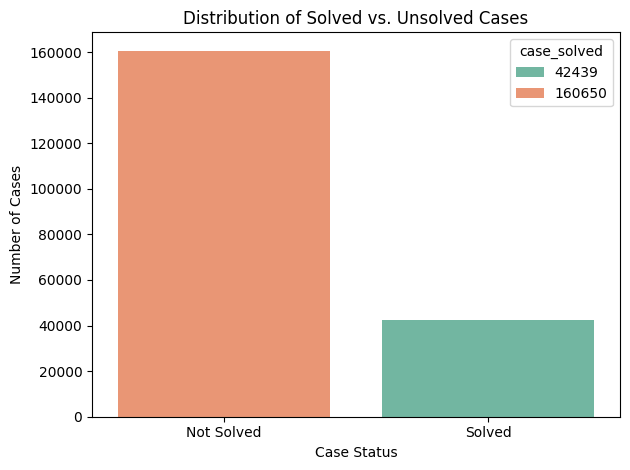

In [1585]:
# Map labels if needed
df_crime_data_merge['case_solved_label'] = df_crime_data_merge['case_solved'].map({0: 'Not Solved', 1: 'Solved'})
case_solve_cnt = df_crime_data_merge.groupby("case_solved_label")['case_solved'].count().reset_index()
# Create plot
sns.barplot(
    data=case_solve_cnt,
    x="case_solved_label",
    y="case_solved",
    hue="case_solved",
    palette='Set2'
)
plt.title('Distribution of Solved vs. Unsolved Cases')
plt.xlabel('Case Status')
plt.ylabel('Number of Cases')

# Add data labels
plt.tight_layout()
plt.show()

#### 3.4 Crime Distribution based on Victim Gender

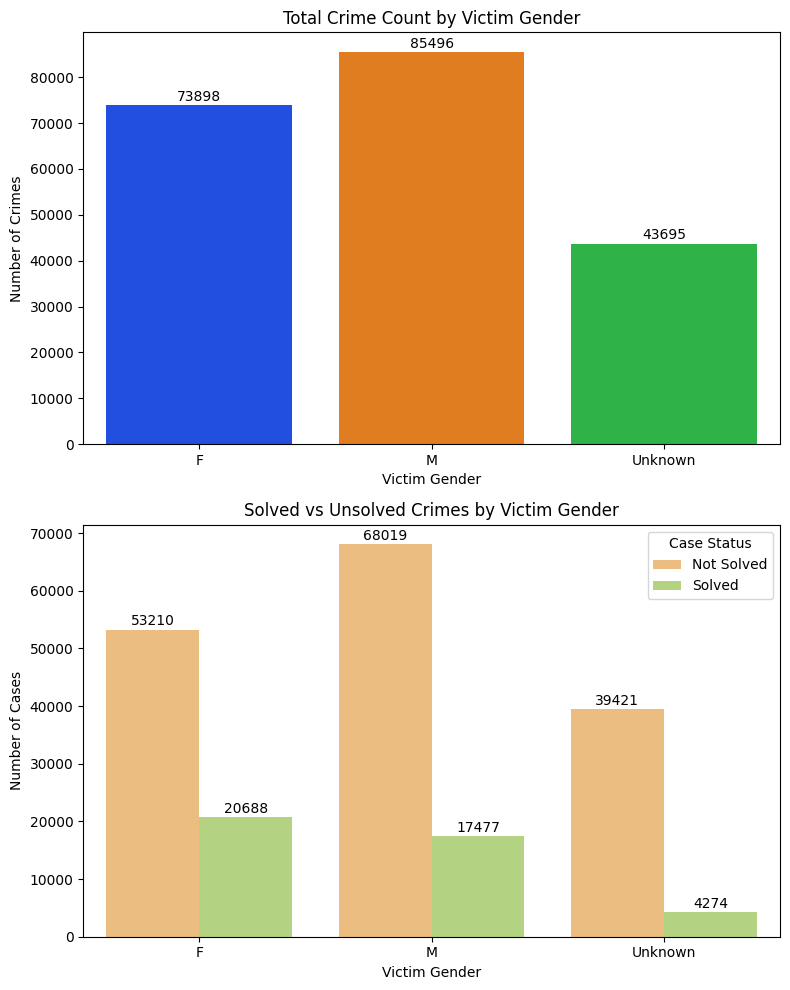

In [1586]:
#convert back 0,1 to solve and unsolve values
df_crime_data_merge['case_solved_label'] = df_crime_data_merge['case_solved'].map({0: 'Not Solved', 1: 'Solved'})

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# 1. Total Crime Count by Gender
ax1 = sns.countplot(x='victim_gender', hue='victim_gender', data=df_crime_data_merge, ax=axes[0], palette='bright', legend=False)
axes[0].set_title('Total Crime Count by Victim Gender')
axes[0].set_xlabel('Victim Gender')
axes[0].set_ylabel('Number of Crimes')
# Add bar labels
for container in ax1.containers:
    ax1.bar_label(container, padding=1)

# 2. Solved vs Unsolved by Gender
ax2 = sns.countplot(x='victim_gender', hue='case_solved_label', data=df_crime_data_merge, ax=axes[1], palette='RdYlGn')
axes[1].set_title('Solved vs Unsolved Crimes by Victim Gender')
axes[1].set_xlabel('Victim Gender')
axes[1].set_ylabel('Number of Cases')
axes[1].legend(title='Case Status')
# Add bar labels
for container in ax2.containers:
    ax2.bar_label(container, padding=1)

# Display plots
plt.tight_layout()
plt.show()



#### 3.5 Crime Distribution based on Victim Ethnicity

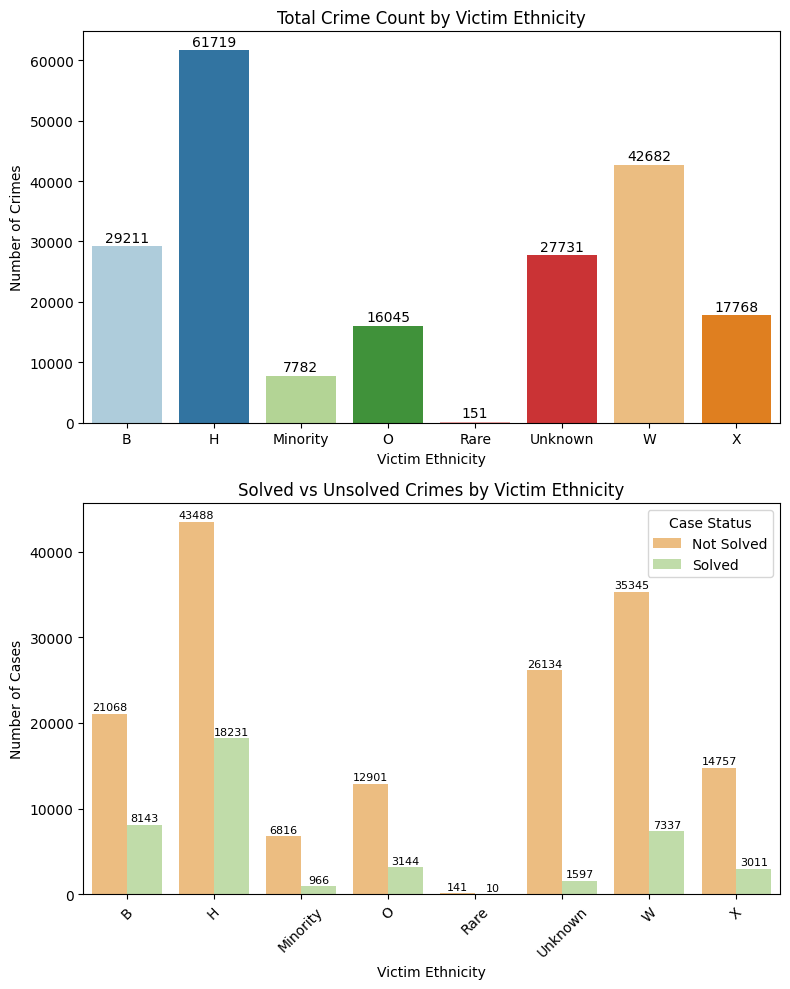

In [1587]:
#convert back 0,1 to solve and unsolve values
df_crime_data_merge['case_solved_label'] = df_crime_data_merge['case_solved'].map({0: 'Not Solved', 1: 'Solved'})

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# 1. Total Crime Count by Ethnicity
ax1 = sns.countplot(x='victim_ethnicity', hue='victim_ethnicity', data=df_crime_data_merge, ax=axes[0], palette='Paired', legend=False)
axes[0].set_title('Total Crime Count by Victim Ethnicity')
axes[0].set_xlabel('Victim Ethnicity')
axes[0].set_ylabel('Number of Crimes')
# Add bar labels
for container in ax1.containers:
    ax1.bar_label(container, padding=1)

# 2. Solved vs Unsolved by Ethnicity
ax2 = sns.countplot(x='victim_ethnicity', hue='case_solved_label', data=df_crime_data_merge, ax=axes[1], palette='Spectral')
axes[1].set_title('Solved vs Unsolved Crimes by Victim Ethnicity')
axes[1].set_xlabel('Victim Ethnicity')
axes[1].set_ylabel('Number of Cases')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Case Status')
# Add bar labels
for container in ax2.containers:
    ax2.bar_label(container, padding=1,fontsize = 8)

# Display plots
plt.tight_layout()
plt.show()

#### 3.6 Histogram and Box Plot of Victim Age Distribution

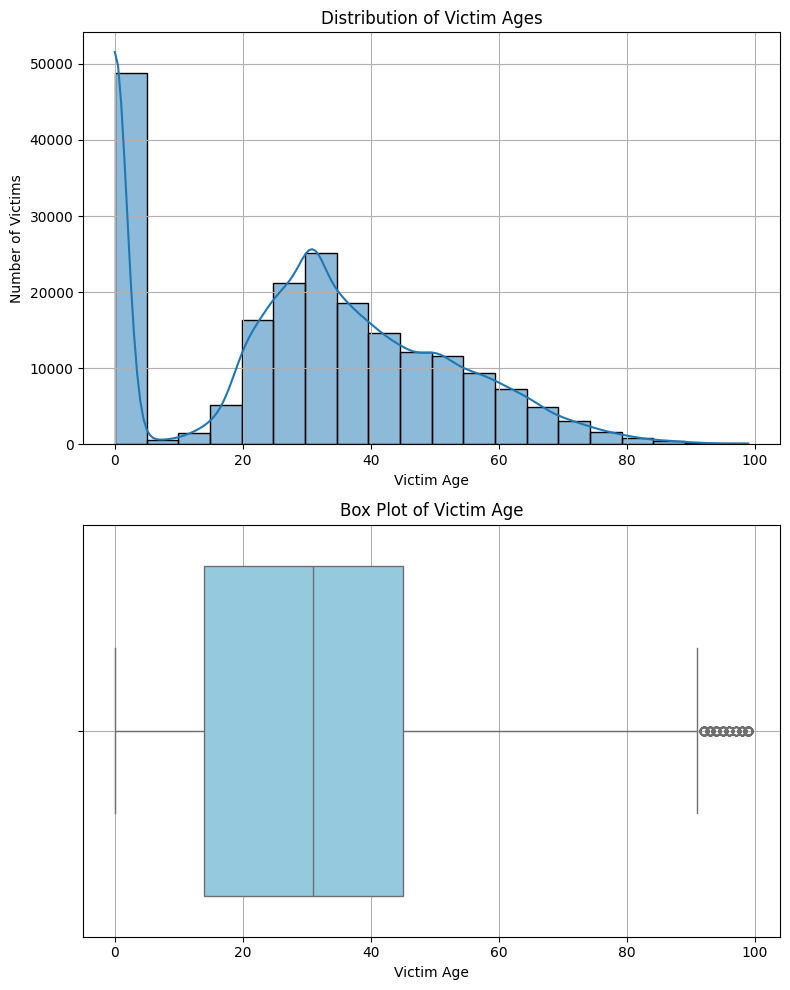

In [1588]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# 1. Total Crime Count by Ethnicity
sns.histplot(data=df_crime_data_merge, x='victim_age', bins=20,ax=axes[0], kde=True)
axes[0].set_title('Distribution of Victim Ages')
axes[0].set_xlabel('Victim Age')
axes[0].set_ylabel('Number of Victims')
axes[0].grid(True)

# 2. Solved vs Unsolved by Ethnicity
sns.boxplot(x='victim_age', data=df_crime_data_merge,ax=axes[1], color='skyblue')
axes[1].set_title('Box Plot of Victim Age')
axes[1].set_xlabel('Victim Age')
axes[1].grid(True)

# Display plots
plt.tight_layout()
plt.show()

0 wll not be removed or replaced since there could be victims of age between 0 and 1

#### 3.7 Correlation Analysis

##### 3.7.1 Correlation Matrix for Numerical Columns

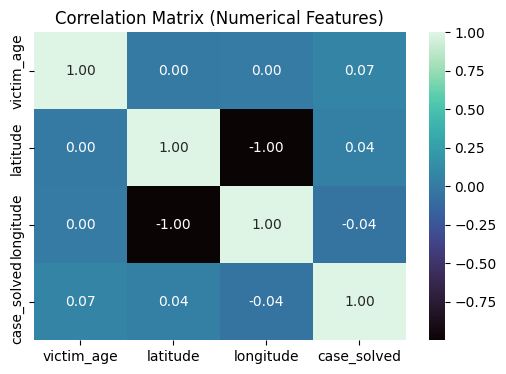

In [1589]:
# Select relevant numerical columns
numerical_cols = ['victim_age', 'latitude', 'longitude', 'case_solved']

# Create correlation matrix
corr_matrix = df_crime_data_merge[numerical_cols].corr()

# Display correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


#### 3.8 Spatial Analysis

##### 3.8.1 Scatter plot showing the number of crimes per area, with Crime solved rate as Bubble Size

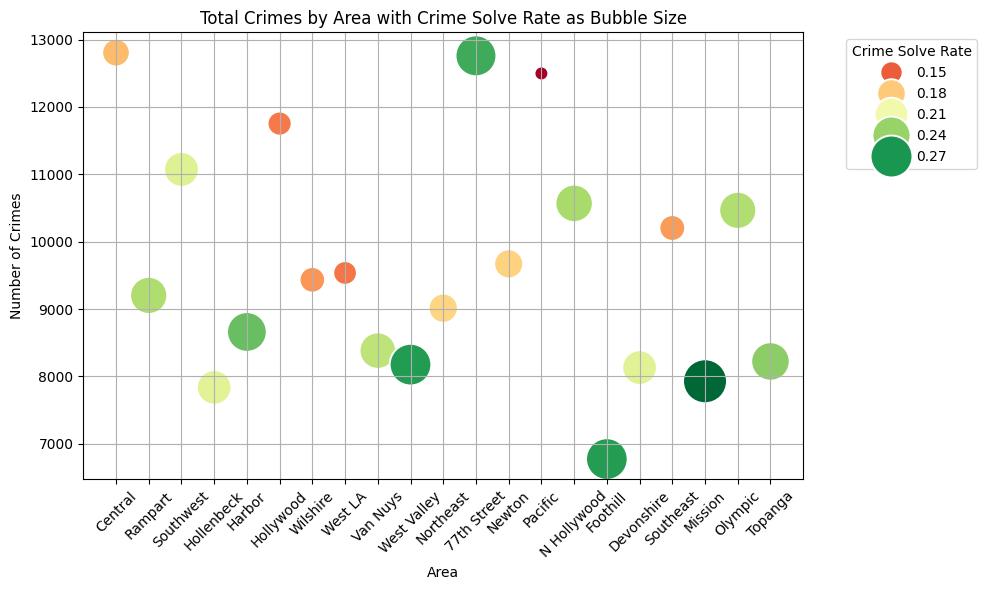

In [1590]:
# Step 1: Aggregate data by area
area_summary = df_crime_data_merge.groupby('area', observed=True).agg(
    total_crimes=('case_solved', 'count'),
    solve_rate=('case_solved', 'mean')
).reset_index()
# Apply it to your summary dataframe
area_summary['area_name'] = area_summary['area'].map(area_mapping)

# Step 2: Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=area_summary,
    x='area_name',
    y='total_crimes',
    size='solve_rate',
    sizes=(100, 1000),
    hue='solve_rate',
    palette='RdYlGn',
    legend='brief'
)

# Step 3: Styling
plt.title('Total Crimes by Area with Crime Solve Rate as Bubble Size')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.legend(title='Crime Solve Rate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1591]:
df_area_grouped = df_crime_data_merge.groupby('area',observed=True).agg({
    'latitude': 'mean',
    'longitude': 'mean',
    # 'case_solved': 'mean' # case solve rate
    'case_solved': 'count'  # Optional: to size bubbles
}).reset_index()
df_area_grouped.head()

,area,latitude,longitude,case_solved
0,1,33.712277,-117.087004,12806
1,2,33.840911,-117.503128,9202
2,3,33.930917,-118.007309,11072
3,4,33.859060,-117.524573,7837
4,5,33.630783,-117.793506,8660


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


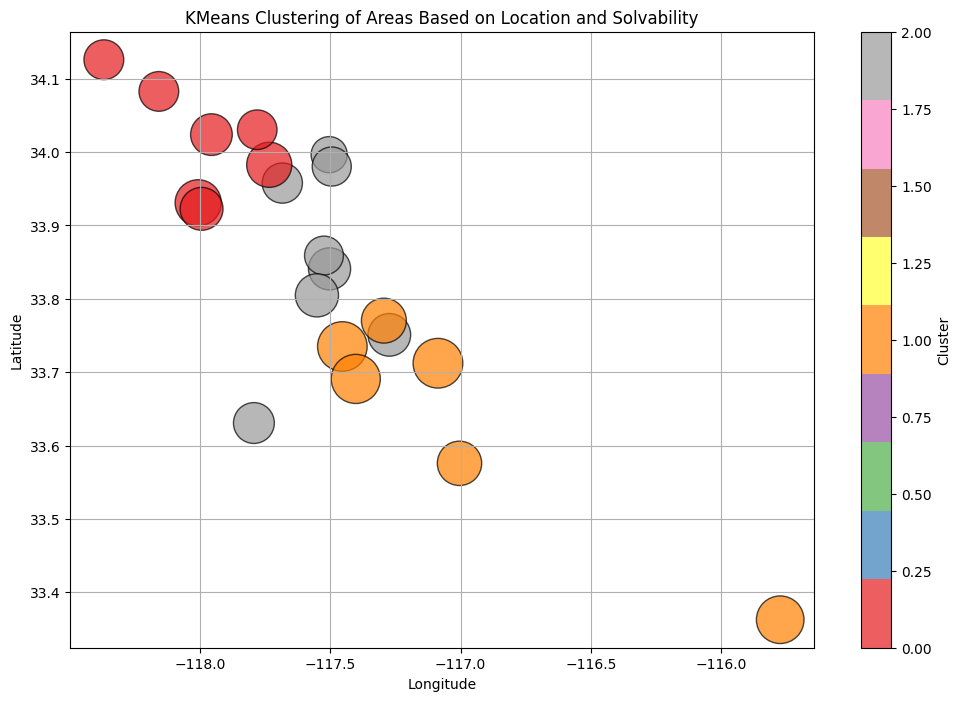

In [1592]:
from sklearn.cluster import KMeans
# Use normalized values to avoid scale bias
from sklearn.preprocessing import StandardScaler

# --- Step 1: Prepare data ---
df_cluster = df_area_grouped[['latitude', 'longitude', 'case_solved']].copy()

# Optional: normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# --- Step 2: Apply KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# --- Step 3: Attach back to original for plotting ---
df_area_grouped['cluster'] = df_cluster['cluster']

# --- Step 4: Plot ---
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_area_grouped['longitude'], df_area_grouped['latitude'],
    c=df_area_grouped['cluster'], cmap='Set1',
    s=df_area_grouped['case_solved'] * 0.1, edgecolor='k', alpha=0.7
)
plt.colorbar(scatter, label='Cluster')
plt.title('KMeans Clustering of Areas Based on Location and Solvability')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


#### 3.9 Crime Type Distribution

##### 3.9.1 Top 10 Crime Count and Solved rate by Crime Type

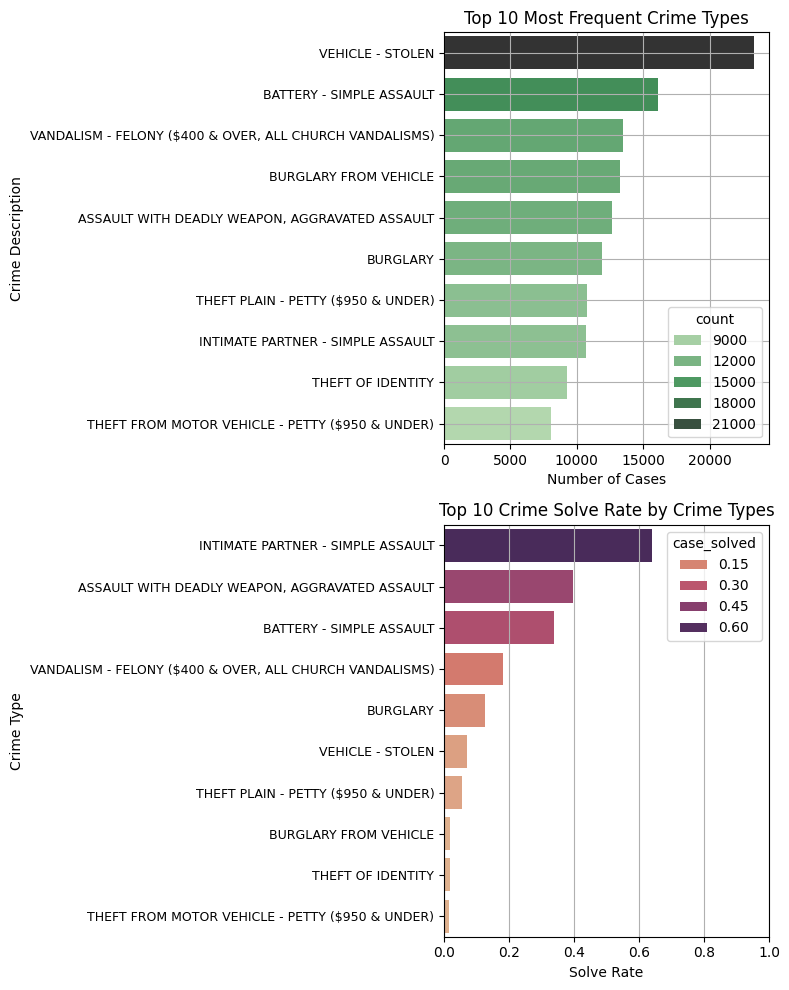

In [1593]:
# Get top 10 most frequent crime types
top_crimes = df_crime_data_merge['crime_description'].value_counts().head(10)
# Top 10 most frequent crime types
top_crimes_idx = df_crime_data_merge['crime_description'].value_counts().head(10).index
# Filter to top crimes
crime_solve_rate = (df_crime_data_merge[df_crime_data_merge['crime_description'].isin(top_crimes_idx)] \
    .groupby('crime_description')['case_solved'].mean()).sort_values(ascending=False)


fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# 1. Total Crime Count by Ethnicity
sns.barplot(y=top_crimes.index, x=top_crimes.values, hue= top_crimes, palette='Greens_d', ax=axes[0])
axes[0].set_title('Top 10 Most Frequent Crime Types')
axes[0].set_xlabel('Number of Cases')
axes[0].set_ylabel('Crime Description')
axes[0].tick_params(axis='y', labelsize=9)
axes[0].grid(True)

# 2. Solved vs Unsolved by Ethnicity
sns.barplot(x=crime_solve_rate.values, y=crime_solve_rate.index, hue= crime_solve_rate, palette='flare', ax=axes[1])
axes[1].set_title('Top 10 Crime Solve Rate by Crime Types')
axes[1].set_xlabel('Solve Rate')
axes[1].set_ylabel('Crime Type')
axes[1].tick_params(axis='y', labelsize=9)
axes[1].set_xlim(0,1)
axes[1].grid(True, axis='x')

# Display plots
plt.tight_layout()
plt.show()

In [1594]:
df_crime_data_merge['crime_description'].nunique()

133

In [1595]:
df_crime_data_merge['weapon_description'].nunique()

74

##### 3.9.2 Top T10 Crime Count and Solve Rate by Weapon Types Used

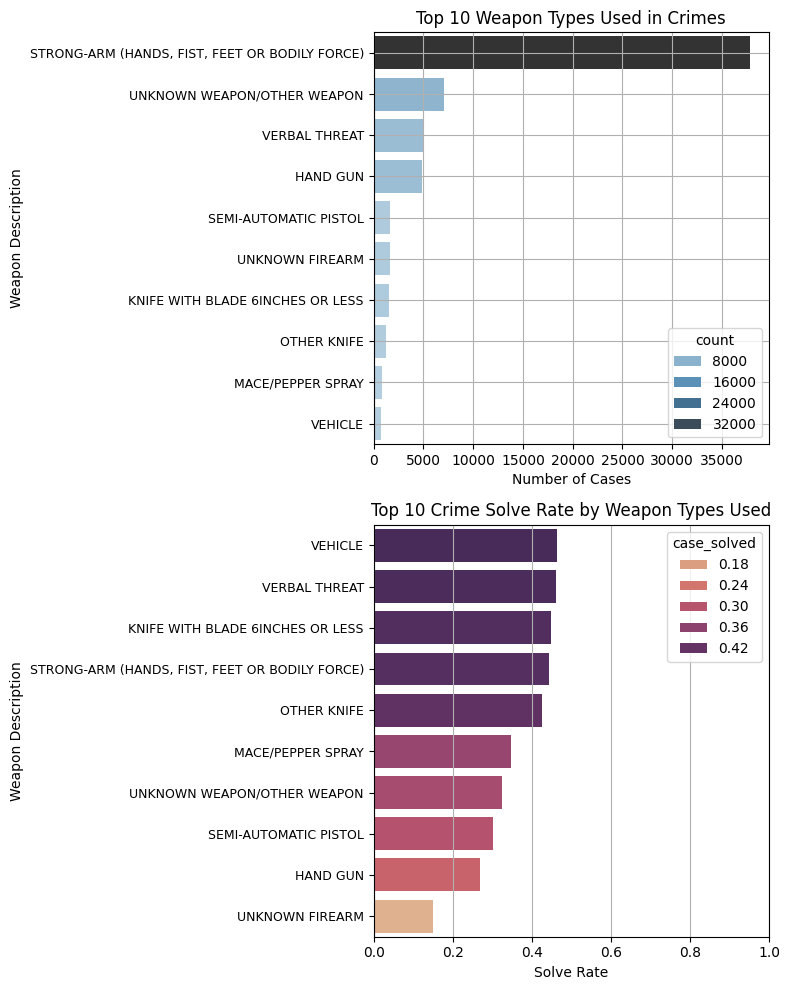

In [1596]:
# Filter out 'NA' or 'Unspecified'
weapon_filtered = df_crime_data_merge[df_crime_data_merge['weapon_description'] != 'NA']

# Get top 10 actual weapon types
top_weapons = weapon_filtered['weapon_description'].value_counts().head(10)
# Top 10 weapon types
top_weapons_indx = weapon_filtered['weapon_description'].value_counts().head(10).index

# Solve rate by weapon type
weapon_solve_rate = weapon_filtered[weapon_filtered['weapon_description'].isin(top_weapons_indx)] \
    .groupby('weapon_description')['case_solved'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(8, 10))
# 1. Total Crime Count by Ethnicity
sns.barplot(y=top_weapons.index, x=top_weapons.values,hue=top_weapons, palette='Blues_d', ax=axes[0])
axes[0].set_title('Top 10 Weapon Types Used in Crimes')
axes[0].set_xlabel('Number of Cases')
axes[0].set_ylabel('Weapon Description')
axes[0].tick_params(axis='y', labelsize=9)
axes[0].grid(True)

# 2. Solved vs Unsolved by Ethnicity
sns.barplot(x=weapon_solve_rate.values, y=weapon_solve_rate.index, hue= weapon_solve_rate, palette='flare', ax=axes[1])
axes[1].set_title('Top 10 Crime Solve Rate by Weapon Types Used')
axes[1].set_xlabel('Solve Rate')
axes[1].set_ylabel('Weapon Description')
axes[1].tick_params(axis='y', labelsize=9)
axes[1].set_xlim(0,1)
axes[1].grid(True, axis='x')

# Display plots
plt.tight_layout()
plt.show()

#### 3.10 Crime Trend Over Time

In [1597]:
df_crime_data_merge['year'] = df_crime_data_merge['date_occurred'].dt.year
df_crime_data_merge['month'] = df_crime_data_merge['date_occurred'].dt.month
df_crime_data_merge['dayofweek'] = df_crime_data_merge['date_occurred'].dt.day_name()
df_crime_data_merge['hour'] = df_crime_data_merge['date_occurred'].dt.hour
df_crime_data_merge[['year','month','dayofweek','hour']].head(10)


,year,month,dayofweek,hour
0,2021,6,Sunday,20
1,2021,1,Thursday,22
2,2021,1,Thursday,2
3,2021,8,Sunday,7
4,2021,11,Sunday,19
5,2021,12,Tuesday,0
6,2021,11,Monday,13
7,2021,8,Tuesday,21
8,2021,11,Tuesday,16
9,2021,11,Monday,18


In [1598]:
df_crime_data_merge['year'].unique()

array([2021])

In [1599]:
df_crime_data_merge['hour'].nunique()

24

##### 3.10.1 Total Crimer Per Month Trend

In [1600]:
# Group by year and month, count crimes
# Group by year and month
monthly_crimes = df_crime_data_merge.groupby(['year', 'month']).agg(
    total_crimes=('case_solved', 'count'),              # Total crime records
    solved_crimes=('case_solved', 'sum')                # Count of solved cases (since 0/1)
).reset_index()

# Combine into date for plotting
monthly_crimes['year_month'] = pd.to_datetime(monthly_crimes[['year', 'month']].assign(day=1))
monthly_crimes

,year,month,total_crimes,solved_crimes,year_month
0,2021,1,16090,3564,2021-01-01
1,2021,2,15227,3285,2021-02-01
2,2021,3,16107,3294,2021-03-01
3,2021,4,15867,3426,2021-04-01
4,2021,5,16737,3564,2021-05-01
5,2021,6,16886,3696,2021-06-01
6,2021,7,18395,4106,2021-07-01
7,2021,8,18031,3841,2021-08-01
8,2021,9,17923,3688,2021-09-01
9,2021,10,18740,3600,2021-10-01


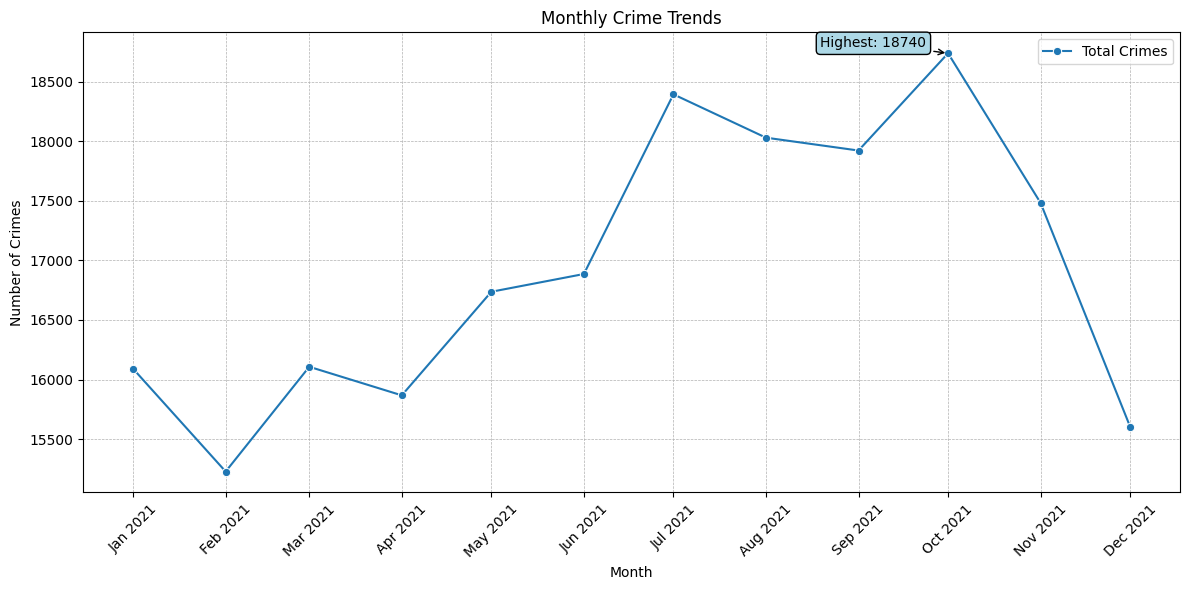

In [1601]:
import matplotlib.dates as mdates
# Monthly Count Plot
# Find the row with the highest total crimes
max_row = monthly_crimes.loc[monthly_crimes['total_crimes'].idxmax()]

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_crimes, x='year_month', y='total_crimes', label='Total Crimes', marker='o')
# Annotate the highest value
plt.annotate(
    f"Highest: {max_row['total_crimes']}",
    xy=(max_row['year_month'], max_row['total_crimes']),
    xytext=(max_row['year_month']-pd.DateOffset(days=25), max_row['total_crimes'] + 50),  # adjust offset as needed
     arrowprops=dict(arrowstyle='->', color='black'),
    ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", ec="black", lw=1)
)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # One tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format: Jan 2023
plt.xticks(rotation=45)  # Rotate for readability
plt.grid(True, axis='x', which='major', linestyle='--', linewidth=0.5)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
# Final stylings
plt.title('Monthly Crime Trends')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##### 3.10.2 Crime Solved Count Compared with Unsolved Count

In [1602]:
# Calculate unsolved crimes
monthly_crimes['unsolved_crimes'] = monthly_crimes['total_crimes'] - monthly_crimes['solved_crimes']

# Melt for grouped bar plot
melted_df = monthly_crimes.melt(
    id_vars='year_month',
    value_vars=['solved_crimes', 'unsolved_crimes'],
    var_name='Case Status',
    value_name='Crime Count'
)
#format x-axis labels as short month-year (e.g. Jan 2023)
melted_df['year_month'] = pd.to_datetime(melted_df['year_month']).dt.strftime('%b %Y')

melted_df

,year_month,Case Status,Crime Count
0,Jan 2021,solved_crimes,3564.0
1,Feb 2021,solved_crimes,3285.0
2,Mar 2021,solved_crimes,3294.0
3,Apr 2021,solved_crimes,3426.0
4,May 2021,solved_crimes,3564.0
5,Jun 2021,solved_crimes,3696.0
6,Jul 2021,solved_crimes,4106.0
7,Aug 2021,solved_crimes,3841.0
8,Sep 2021,solved_crimes,3688.0
9,Oct 2021,solved_crimes,3600.0


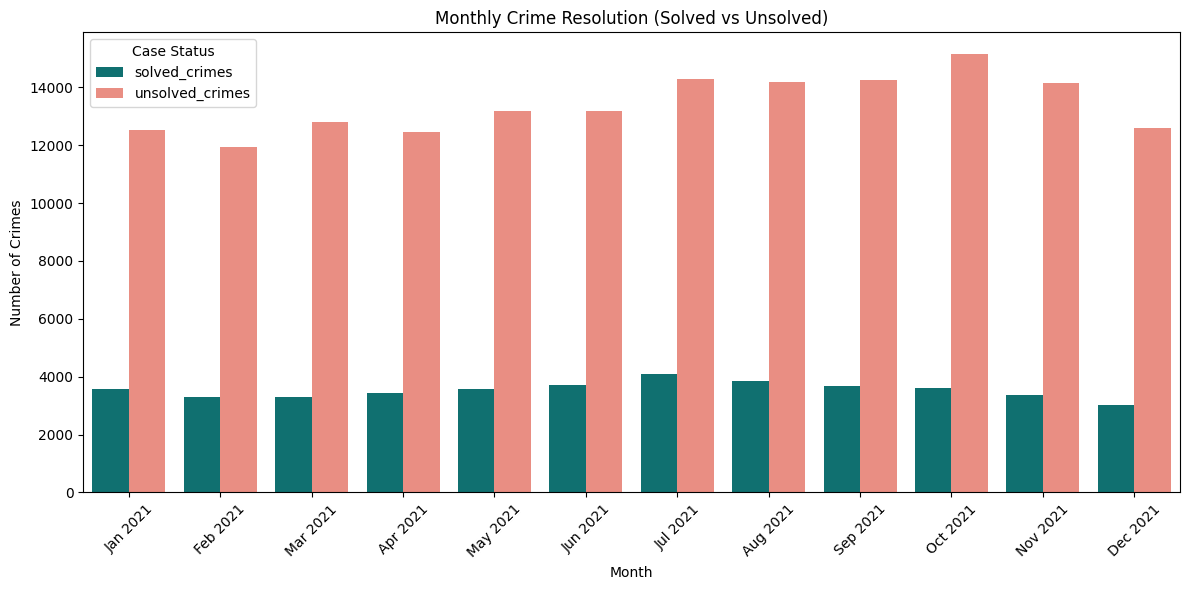

In [1603]:
# Mapping from raw to clean labels
color_map = {
    'solved_crimes': 'teal',
    'unsolved_crimes': 'salmon'
}

plt.figure(figsize=(12, 6))
sns.barplot(
    data=melted_df,
    x='year_month',
    y='Crime Count',
    hue='Case Status',
    palette=color_map, legend= True
)

plt.title('Monthly Crime Resolution (Solved vs Unsolved)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
# plt.legend(title='Case Status', labels=['Solved', 'Unsolved'])
plt.tight_layout()
plt.show()


##### 3.10.3 Average Crime Occurence by Day of Month, Week and Hour of Day

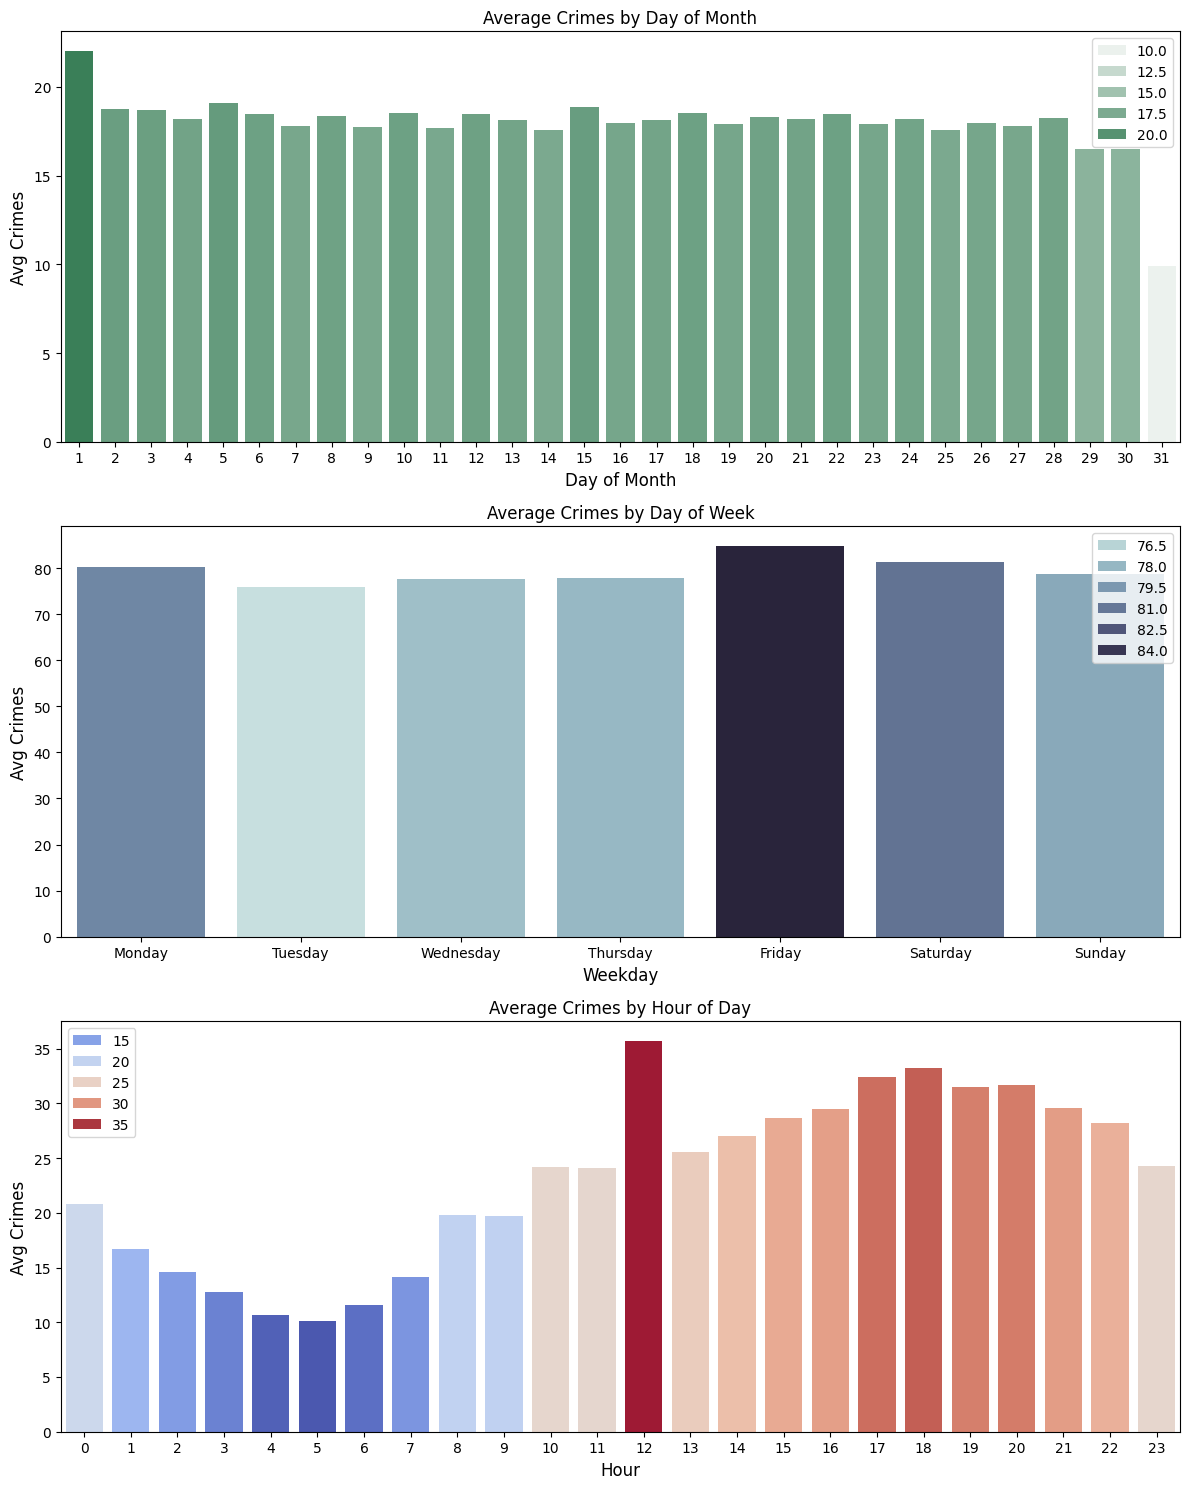

In [1604]:
# df_crime_data_merge['date_occurred'] = pd.to_datetime(df_crime_data_merge['date_occurred'])

# Extract time components
df_crime_data_merge['day'] = df_crime_data_merge['date_occurred'].dt.day
df_crime_data_merge['weekday'] = df_crime_data_merge['date_occurred'].dt.day_name()
df_crime_data_merge['hour'] = pd.to_datetime(df_crime_data_merge['date_occurred']).dt.hour

# Calculate number of unique dates
n_unique_days = df_crime_data_merge['date_occurred'].dt.date.nunique()

# Average crimes per day of month
day_avg = df_crime_data_merge.groupby('day').size() / n_unique_days

# Average crimes per weekday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = df_crime_data_merge.groupby('weekday').size() / n_unique_days
weekday_avg = weekday_avg.reindex(weekday_order)

# Average crimes per hour
hour_avg = df_crime_data_merge.groupby('hour').size() / n_unique_days

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Plot 1: Day of month
palette_1 = sns.light_palette("seagreen", as_cmap=True)
sns.barplot(x=day_avg.index, y=day_avg.values, ax=axes[0], palette=palette_1,hue=day_avg.values, legend=True)
axes[0].set_title('Average Crimes by Day of Month',fontsize =12)
axes[0].set_xlabel('Day of Month',fontsize =12)
axes[0].set_ylabel('Avg Crimes',fontsize =12)

# Plot 2: Weekday
palette_2 = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.barplot(x=weekday_avg.index, y=weekday_avg.values, ax=axes[1], palette=palette_2,hue=weekday_avg.values, legend=True)
axes[1].set_title('Average Crimes by Day of Week',fontsize =12)
axes[1].set_xlabel('Weekday',fontsize =12)
axes[1].set_ylabel('Avg Crimes',fontsize =12)

# Plot 3: Hour of day
sns.barplot(x=hour_avg.index, y=hour_avg.values, ax=axes[2], palette='coolwarm', hue=hour_avg.values, legend=True)
axes[2].set_title('Average Crimes by Hour of Day',fontsize =12)
axes[2].set_xlabel('Hour',fontsize =12)
axes[2].set_ylabel('Avg Crimes',fontsize =12)


plt.tight_layout()
plt.show()


### 4.Feature Engineering

For Feature Engineering, cleaned unmerged data set(not merged with crime type or weapon type lookup data) will be used.

#### 4.1 Explore Data to Determine which Transformation or Encoding to be done

In [1605]:
df_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203089 entries, 211414090 to 212005847
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_reported       203089 non-null  datetime64[ns]
 1   date_occurred       203089 non-null  datetime64[ns]
 2   area                203089 non-null  category      
 3   reporting_district  203089 non-null  category      
 4   part                203089 non-null  category      
 5   crime_code          203089 non-null  object        
 6   modus_operandi      203089 non-null  object        
 7   victim_age          203089 non-null  Int64         
 8   victim_gender       203089 non-null  category      
 9   victim_ethnicity    203089 non-null  category      
 10  premise_code        203086 non-null  category      
 11  weapon_code         203089 non-null  object        
 12  incident_admincode  203089 non-null  category      
 13  latitude            203

In [1606]:
df_crime_data.head()

,date_reported,date_occurred,area,reporting_district,part,crime_code,modus_operandi,victim_age,victim_gender,victim_ethnicity,premise_code,weapon_code,incident_admincode,latitude,longitude,case_solved
division_number,,,,,,,,,,,,,,,,
211414090,2021-06-27,2021-06-20 20:00:00,14,1464,1,480,[0344],32,M,W,707,Unspecified,0,33.9791,-118.4092,0
210504861,2021-01-22,2021-01-21 22:00:00,5,515,1,510,[NA],0,Unknown,Unknown,101,Unspecified,1,33.7929,-118.2710,1
210104843,2021-01-21,2021-01-21 02:00:00,1,139,1,510,[NA],0,Unknown,Unknown,101,Unspecified,1,34.0420,-118.2326,1
210115564,2021-08-22,2021-08-22 07:00:00,1,151,1,350,"[1308, 0344, 0345, 1822]",29,M,W,102,Unspecified,0,34.0496,-118.2603,0
211421187,2021-11-09,2021-11-07 19:00:00,14,1465,1,510,[NA],0,Unknown,Unknown,101,Unspecified,0,33.9869,-118.4022,0


In [1607]:
#split date_occurred and hour_occurred
df_crime_data['hour_occurred'] = df_crime_data['date_occurred'].dt.hour
df_crime_data['date_occurred'] = df_crime_data['date_occurred'].dt.date
df_crime_data.head()

,date_reported,date_occurred,area,reporting_district,part,crime_code,modus_operandi,victim_age,victim_gender,victim_ethnicity,premise_code,weapon_code,incident_admincode,latitude,longitude,case_solved,hour_occurred
division_number,,,,,,,,,,,,,,,,,
211414090,2021-06-27,2021-06-20,14,1464,1,480,[0344],32,M,W,707,Unspecified,0,33.9791,-118.4092,0,20
210504861,2021-01-22,2021-01-21,5,515,1,510,[NA],0,Unknown,Unknown,101,Unspecified,1,33.7929,-118.2710,1,22
210104843,2021-01-21,2021-01-21,1,139,1,510,[NA],0,Unknown,Unknown,101,Unspecified,1,34.0420,-118.2326,1,2
210115564,2021-08-22,2021-08-22,1,151,1,350,"[1308, 0344, 0345, 1822]",29,M,W,102,Unspecified,0,34.0496,-118.2603,0,7
211421187,2021-11-09,2021-11-07,14,1465,1,510,[NA],0,Unknown,Unknown,101,Unspecified,0,33.9869,-118.4022,0,19


In [1608]:
df_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203089 entries, 211414090 to 212005847
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_reported       203089 non-null  datetime64[ns]
 1   date_occurred       203089 non-null  object        
 2   area                203089 non-null  category      
 3   reporting_district  203089 non-null  category      
 4   part                203089 non-null  category      
 5   crime_code          203089 non-null  object        
 6   modus_operandi      203089 non-null  object        
 7   victim_age          203089 non-null  Int64         
 8   victim_gender       203089 non-null  category      
 9   victim_ethnicity    203089 non-null  category      
 10  premise_code        203086 non-null  category      
 11  weapon_code         203089 non-null  object        
 12  incident_admincode  203089 non-null  category      
 13  latitude            203

In [1609]:
categorical_cols

['area',
 'reporting_district',
 'part',
 'victim_gender',
 'victim_ethnicity',
 'premise_code',
 'incident_admincode',
 'case_solved',
 'crime_description',
 'weapon_description']

In [1610]:
# Count unique values in categorical column
categorical_cols = ['area',
                    'reporting_district',
                    'part',
                    'victim_gender',
                    'victim_ethnicity',
                    'premise_code',
                    'incident_admincode',
                    'case_solved',
                    'crime_code',
                    'weapon_code']
for col in categorical_cols:
    if(col != 'modus_operandi'):
        unique_count = df_crime_data[col].nunique(dropna=False)
        print(f"{col} Count: {unique_count}")


area Count: 21
reporting_district Count: 1160
part Count: 2
victim_gender Count: 3
victim_ethnicity Count: 8
premise_code Count: 295
incident_admincode Count: 2
case_solved Count: 2
crime_code Count: 133
weapon_code Count: 74


One-hot encoding for the categorical variable with unique count less than 25
- areaCount: 21
- partCount: 2
- victim_gender Count: 4
- victim_ethnicity Count: 15
- incident_admincode Count: 2
- case_solved Count: 2

In [1611]:
pd.set_option('display.max_rows', None)

In [1612]:
crime_cnt_by_type = df_crime_data_merge['crime_description'].value_counts().sort_values(ascending=False).reset_index()
crime_cnt_by_type.columns = ['crime_description', 'count']
crime_cnt_by_type['Percent Occurence'] = round(crime_cnt_by_type['count']/(crime_cnt_by_type['count'].sum()),2)
crime_cnt_by_type[:50]

,crime_description,count,Percent Occurence
0,VEHICLE - STOLEN,23309,0.11
1,BATTERY - SIMPLE ASSAULT,16079,0.08
2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",13510,0.07
3,BURGLARY FROM VEHICLE,13272,0.07
4,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",12686,0.06
5,BURGLARY,11906,0.06
6,THEFT PLAIN - PETTY ($950 & UNDER),10797,0.05
7,INTIMATE PARTNER - SIMPLE ASSAULT,10660,0.05
8,THEFT OF IDENTITY,9278,0.05
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),8020,0.04


In [1613]:
round(crime_cnt_by_type['count'][:40].sum()/(crime_cnt_by_type['count'].sum()),2)

0.96

Decision On Crime Type Encoding: Top 40 of crime type cover 96% of the crime, therefore only top 40 will be one-hot coded and the rest will be coded as others

In [1614]:
crime_cnt_by_weapon = df_crime_data_merge['weapon_description'].value_counts().sort_values(ascending=False).reset_index()
crime_cnt_by_weapon.columns = ['weapon_description', 'count']
crime_cnt_by_weapon['Percent Occurence'] = round(crime_cnt_by_weapon['count']/(crime_cnt_by_weapon['count'].sum()),2)
crime_cnt_by_weapon

,weapon_description,count,Percent Occurence
0,NA,131843,0.65
1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",37828,0.19
2,UNKNOWN WEAPON/OTHER WEAPON,7061,0.03
3,VERBAL THREAT,5059,0.02
4,HAND GUN,4809,0.02
5,SEMI-AUTOMATIC PISTOL,1676,0.01
6,UNKNOWN FIREARM,1618,0.01
7,KNIFE WITH BLADE 6INCHES OR LESS,1562,0.01
8,OTHER KNIFE,1256,0.01
9,MACE/PEPPER SPRAY,833,0.00


In [1615]:
#remove NA to calculate the coverage
crime_cnt_by_weapon = crime_cnt_by_weapon[crime_cnt_by_weapon['weapon_description'] != 'NA']
round(crime_cnt_by_weapon['count'][:30].sum()/(crime_cnt_by_weapon['count'].sum()),2)

0.98

Decision On Weapon Type Encoding: Top 30 of crime type cover 98% of the crime, therefore only top 40 will be one-hot coded and the rest will be coded as others

Reporting District

In [1616]:
crime_cnt_by_district = df_crime_data_merge['reporting_district'].value_counts().sort_values(ascending=False).reset_index()
crime_cnt_by_district.columns = ['reporting_district', 'count']
crime_cnt_by_district['Percent Occurence'] = round(crime_cnt_by_district['count']/(crime_cnt_by_district['count'].sum()),2)
crime_cnt_by_district.head(10)

,reporting_district,count,Percent Occurence
0,645,1221,0.01
1,162,1039,0.01
2,636,987,0.00
3,1494,955,0.00
4,182,931,0.00
5,646,866,0.00
6,111,778,0.00
7,1822,709,0.00
8,1555,671,0.00
9,2156,666,0.00


In [1617]:
#remove NA to calculate the coverage
round(crime_cnt_by_district['count'][:40].sum()/(crime_cnt_by_district['count'].sum()),2)

0.12

Do Chi-Square Test to Check relation between Categorical and Target Variables

In [1618]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(df_crime_data['reporting_district'], df_crime_data['case_solved'])

# Run chi-square test
chi2, p, dof, ex = chi2_contingency(contingency)

print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi2 = 6061.31, p-value = 0.0000


In [1619]:
df_crime_data['reporting_district'].nunique()

1160

Decision On Reporting District: 
- p-value is significant for Chi-square test, it cannot be dropped.
- Since top 40 values for reporting district covers only for 12% of crime data, frequency encoding will use used for reporting_district variable
However, reporting district has 1160 of varieties and after including its frequency encoding, the regression fail to converge. Since reporting district is also location information, and logitude and lattitude informations are already available, it is decided to drop reporting district.

In order to make sure all category variables are relevant, chi-square test is performed for all categorical variables

In [1620]:
from scipy.stats import chi2_contingency

# Make sure case_solved is binary (0 and 1)
# Already appears to be uint8 (0: Not solved, 1: Solved)

categorical_cols = [
    'area', 'part', 'victim_gender', 'victim_ethnicity','premise_code',
    'incident_admincode', 'crime_code', 'weapon_code', 'reporting_district'
]

significant_vars = []

print("Chi-Square Test Results:\n")
for col in categorical_cols:
    contingency = pd.crosstab(df_crime_data[col], df_crime_data['case_solved'])

    # Optional: skip if too many categories with low counts
    if contingency.shape[0] < 2 or contingency.shape[1] != 2:
        print(f"Skipping {col} - not enough categories or binary target classes.")
        continue

    chi2, p, dof, expected = chi2_contingency(contingency)

    print(f"{col:20s} | p-value = {p:.6f}")
    if p < 0.05:
        significant_vars.append(col)

print("\nSignificant Variables Based on Chi-Square Test:")
print(significant_vars)


Chi-Square Test Results:

area                 | p-value = 0.000000
part                 | p-value = 0.000000
victim_gender        | p-value = 0.000000
victim_ethnicity     | p-value = 0.000000
premise_code         | p-value = 0.000000
incident_admincode   | p-value = 0.000000
crime_code           | p-value = 0.000000
weapon_code          | p-value = 0.000000
reporting_district   | p-value = 0.000000

Significant Variables Based on Chi-Square Test:
['area', 'part', 'victim_gender', 'victim_ethnicity', 'premise_code', 'incident_admincode', 'crime_code', 'weapon_code', 'reporting_district']


#### 4.2 Data Transformation and Encoding

copy data

In [1621]:
#1.copy data frame so that the data frame suited for other models can be derived from original data
df_log_reg = df_crime_data.copy()

Handle DateTime
- only date_occured will be used as timeseries predictor
- date_reported will be transformed to report dealy day since we are not interested in report pattern but how fast the crime was solved

In [1622]:
# 2. Parse datetime columns
df_log_reg['date_occurred'] = pd.to_datetime(df_log_reg['date_occurred'])
df_log_reg['date_reported'] = pd.to_datetime(df_log_reg['date_reported'])
# 3. Extract time-based features
df_log_reg['month'] = df_log_reg['date_occurred'].dt.month
df_log_reg['weekday'] = df_log_reg['date_occurred'].dt.dayofweek
# Calculate delay days from the difference between date_reported and date_occured
df_log_reg['report_delay_days'] = (df_log_reg['date_reported'] - df_log_reg['date_occurred']).dt.days.clip(lower=0)
# Drop original date fields
df_log_reg.drop(columns=['date_occurred', 'date_reported'], inplace=True)

# 4. Cyclical encoding for hour_occurred
df_log_reg['hour_sin'] = np.sin(2 * np.pi * df_log_reg['hour_occurred'] / 24)
df_log_reg['hour_cos'] = np.cos(2 * np.pi * df_log_reg['hour_occurred'] / 24)
df_log_reg.drop(columns=['hour_occurred'], inplace=True)

Drop Reporting District to reduce Dimension since longitude and latitude are avialble for Location.

In [1623]:
df_log_reg.drop(columns=['reporting_district'], inplace=True)

Crime Code Encoding. Only Top 40 (96% of coverage) is coded and the remain are coded as other.

In [1624]:
# 6. One-hot encode top 40 crime_codes
top_crimes_types = df_log_reg['crime_code'].value_counts().nlargest(40).index
df_log_reg['crime_code'] = df_log_reg['crime_code'].apply(lambda x: x if x in top_crimes_types else 'Other')

Weapon Code Encoding: Only Top 30 (98% of coverage) is coded and the remain are coded as other.

In [1625]:
# 7. One-hot encode top 30 weapon_codes (keep 'NA' as its own category)
top_weapons_type = df_log_reg['weapon_code'].value_counts().nlargest(30).index

# Treat 'NA' as a distinct group — never lump into 'Other'
df_log_reg['weapon_code'] = df_log_reg['weapon_code'].apply(
    lambda x: x if x in top_weapons_type or x == 'NA' else 'Other'
)

Drop Modus Operandi Since Encoding it given too high Dimension

In [1626]:
# drop column
df_log_reg.drop(columns=['modus_operandi'], inplace=True)

One-Hot encoder for other categorical variables

In [1627]:
# 9. One-hot encode other categorical variables
one_hot_cols = [
    'area', 'part', 'victim_gender', 'victim_ethnicity',
    'incident_admincode', 'crime_code', 'weapon_code'
]
df_log_reg = pd.get_dummies(df_log_reg, columns=one_hot_cols, drop_first=True)

#### 4.3 Standardized the Columns with Numeric Values

In [1628]:
# 10. Standardize numeric columns
scaler = StandardScaler()
num_cols = ['victim_age', 'latitude', 'longitude', 'report_delay_days']
df_log_reg[num_cols] = scaler.fit_transform(df_log_reg[num_cols])

#### 4.4 Prepare Data For Model Fitting

##### 4.4.1 Split Data for Time Series

In [1629]:
# 11. Sort and perform manual time series split
df_logreg = df_log_reg.sort_values(by='month')
train_df = df_logreg[df_logreg['month'] <= 9]
test_df = df_logreg[df_logreg['month'] > 9]

In [1630]:
train_df.columns

Index(['victim_age', 'premise_code', 'latitude', 'longitude', 'case_solved',
       'month', 'weekday', 'report_delay_days', 'hour_sin', 'hour_cos',
       ...
       'weapon_code_311', 'weapon_code_312', 'weapon_code_400',
       'weapon_code_500', 'weapon_code_506', 'weapon_code_511',
       'weapon_code_512', 'weapon_code_515', 'weapon_code_Other',
       'weapon_code_Unspecified'],
      dtype='object', length=111)

In [1631]:
# Final feature sets
X_train = train_df.drop(columns=['case_solved'])
y_train = train_df['case_solved']
X_test = test_df.drop(columns=['case_solved'])
y_test = test_df['case_solved']

In [1632]:
#Check if there is any Null due to encodings

print(f"Feature reduction complete. Remaining features: {X_train.shape[1]}")
print("NaNs in train set:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

print("\nNaNs in test set:")
print(X_test.isnull().sum()[X_test.isnull().sum() > 0])


Feature reduction complete. Remaining features: 110
NaNs in train set:
premise_code    2
dtype: int64

NaNs in test set:
premise_code    1
dtype: int64


In [1633]:
# Fix for premise_code (categorical column)
mode_premise = X_train['premise_code'].mode(dropna=True)[0]

# Safely fill missing values without SettingWithCopyWarning
X_train.loc[:, 'premise_code'] = X_train['premise_code'].fillna(mode_premise)
X_test.loc[:, 'premise_code'] = X_test['premise_code'].fillna(mode_premise)

### 5. Logsitic Regression

In [1634]:
# ==========================
# Fit Model
# ==========================
# Fit and track best performing model
best_score = 0
best_model = None
best_C = None

for C in [0.1, 1, 10]:
    model = LogisticRegression(penalty='l2', C=C, solver='lbfgs',
                               max_iter=2000, class_weight='balanced')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f"C={C}, F1 Score={score:.4f}")
    
    if score > best_score:
        best_score = score
        best_model = model
        best_C = C

print(f"\nBest C: {best_C}, F1 Score: {best_score:.4f}")

# ==========================
# Evaluate Model
# ==========================
lr_pred = best_model.predict(X_test)
lr_prob = best_model.predict_proba(X_test)[:, 1]

print("\n=== Classification Report ===")
print(classification_report(y_test, lr_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print(f"Accuracy:  {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall:    {recall_score(y_test, lr_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, lr_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, lr_prob):.4f}")


C=0.1, F1 Score=0.9768
C=1, F1 Score=0.9772
C=10, F1 Score=0.9773

Best C: 10, F1 Score: 0.9773

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     41851
           1       0.97      0.99      0.98      9975

    accuracy                           0.99     51826
   macro avg       0.98      0.99      0.99     51826
weighted avg       0.99      0.99      0.99     51826

Confusion Matrix:
 [[41497   354]
 [  104  9871]]
Accuracy:  0.9912
Precision: 0.9654
Recall:    0.9896
F1 Score:  0.9773
ROC AUC:   0.9967


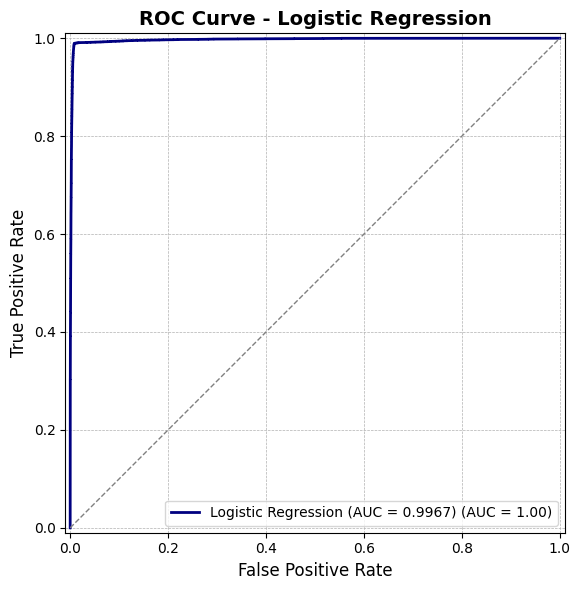

Model saved to 'best_logreg_model.pkl'


In [1635]:
# Plot ROC curve
fig, ax = plt.subplots(figsize=(8, 6))

RocCurveDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    ax=ax,
    name=f"Logistic Regression (AUC = {roc_auc_score(y_test, lr_prob):.4f})",
    curve_kwargs={"color": "navy", "lw": 2}
)

# Add diagonal line
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)

# Improve aesthetics
ax.set_title("ROC Curve - Logistic Regression", fontsize=14, fontweight='bold')
ax.set_xlabel("False Positive Rate", fontsize=12)
ax.set_ylabel("True Positive Rate", fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(loc="lower right", fontsize=10)

plt.tight_layout()
plt.show()
# ==========================
# 6. Save Model
# ==========================
joblib.dump(best_model, "best_logreg_model.pkl")
print("Model saved to 'best_logreg_model.pkl'")

### 6. Random Forest and XGBosst Regressors

In [1636]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151263 entries, 210604546 to 210117888
Columns: 110 entries, victim_age to weapon_code_Unspecified
dtypes: bool(101), category(1), float64(6), int32(2)
memory usage: 24.1 MB


In [1637]:
# Convert Boolean Columns to Int type since XGBoost is giving error
common_bool_cols = [
    col for col in X_train.select_dtypes(include='bool').columns
    if col in X_test.columns
]

for col in common_bool_cols:
    X_train[col] = X_train[col].astype('int32')
    X_test[col] = X_test[col].astype('int32')
# Convert 'category' dtype columns to int
for col in X_train.select_dtypes(include='category').columns:
    X_train[col] = X_train[col].astype('int32')
    X_test[col] = X_test[col].astype('int32')
    
# --- Fit Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

# --- Fit XGBoost ---


xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

In [1638]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n=== {name} ===")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC:   {roc_auc_score(y_true, y_prob):.4f}")

evaluate_model("Random Forest", y_test, rf_pred, rf_prob)
evaluate_model("XGBoost", y_test, xgb_pred, xgb_prob)



=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     41851
           1       0.97      0.99      0.98      9975

    accuracy                           0.99     51826
   macro avg       0.98      0.99      0.99     51826
weighted avg       0.99      0.99      0.99     51826

Confusion Matrix:
 [[41534   317]
 [  125  9850]]
Accuracy:  0.9915
Precision: 0.9688
Recall:    0.9875
F1 Score:  0.9781
ROC AUC:   0.9964

=== XGBoost ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     41851
           1       0.97      0.99      0.98      9975

    accuracy                           0.99     51826
   macro avg       0.98      0.99      0.99     51826
weighted avg       0.99      0.99      0.99     51826

Confusion Matrix:
 [[41533   318]
 [  134  9841]]
Accuracy:  0.9913
Precision: 0.9687
Recall:    0.9866
F1 Score:  0.9776
ROC AUC:   0.9966


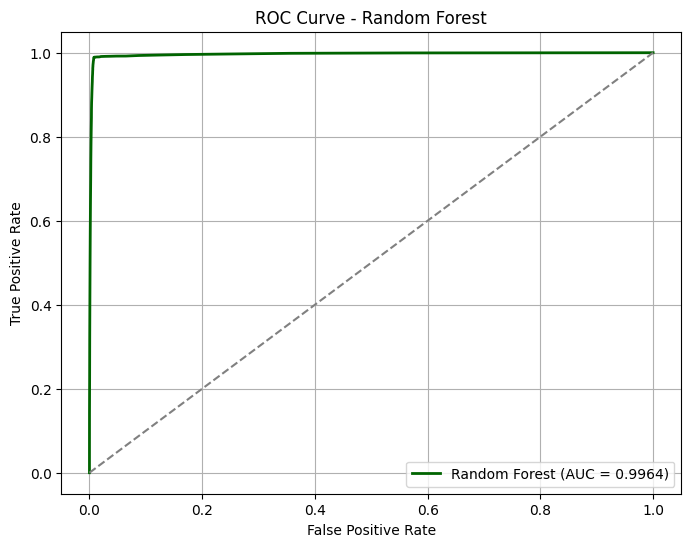

In [1639]:
# Random Forest - predicted probabilities
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot RF ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

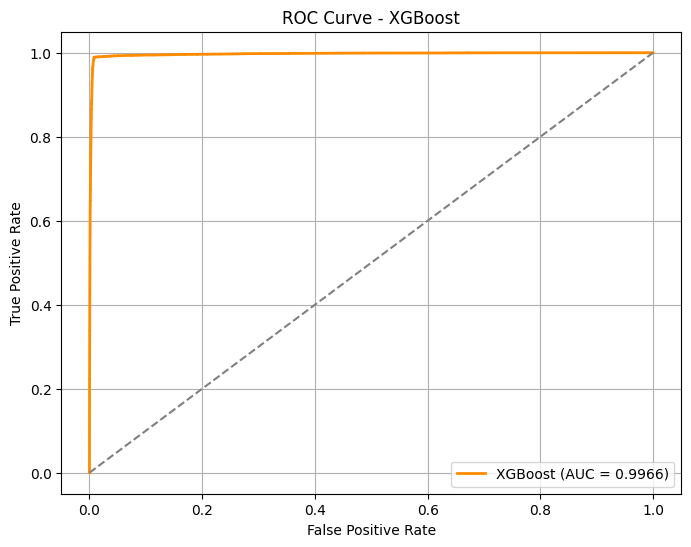

In [1640]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot XGB ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1641]:
print("Unique values in y_test:", y_test.unique())
print("Data type of y_test:", y_test.dtype)


Unique values in y_test: [0 1]
Data type of y_test: uint8


In [1642]:
print(hasattr(xgb_model, "classes_"))  # Should return True
print(xgb_model.classes_)              # Should print [0 1]


True
[0 1]


### 7. Comparison Summary of Logistic Regression, Random Forest Regression and XGBoost

#### 7.1 Summary

In [1643]:
summary_data = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, xgb_pred)
    ],
    "Precision": [
        precision_score(y_test, lr_pred),
        precision_score(y_test, rf_pred),
        precision_score(y_test, xgb_pred)
    ],
    "Recall": [
        recall_score(y_test, lr_pred),
        recall_score(y_test, rf_pred),
        recall_score(y_test, xgb_pred)
    ],
    "F1 Score": [
        f1_score(y_test, lr_pred),
        f1_score(y_test, rf_pred),
        f1_score(y_test, xgb_pred)
    ],
    "ROC AUC": [
        roc_auc_score(y_test, lr_prob),
        roc_auc_score(y_test, rf_prob),
        roc_auc_score(y_test, xgb_prob)
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.round(4)  # Round to 4 decimal places for readability

print(summary_df)

                 Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0  Logistic Regression    0.9912     0.9654  0.9896    0.9773   0.9967
1        Random Forest    0.9915     0.9688  0.9875    0.9781   0.9964
2              XGBoost    0.9913     0.9687  0.9866    0.9776   0.9966


#### 7.2 Important Features

##### 7.2.1 Logistic Regression

In [1653]:
# Logistic Regression
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": best_model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
coef_df["AbsCoefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="AbsCoefficient", ascending=False)
# print("Logistic Regresssion Feature and Coefficients \n",coef_df[coef_df["Coefficient"].abs()>0.45])
print("Logistic Regresssion Feature and Coefficients \n",coef_df.head(20))

Logistic Regresssion Feature and Coefficients 
                      Feature  Coefficient  AbsCoefficient
39      incident_admincode_1     9.343684        9.343684
6          report_delay_days    -5.127798        5.127798
43            crime_code_236     2.332913        2.332913
51            crime_code_354    -2.301636        2.301636
47            crime_code_331    -2.058218        2.058218
75            crime_code_903     1.982245        1.982245
73            crime_code_900     1.921636        1.921636
46            crime_code_330    -1.858529        1.858529
52            crime_code_420    -1.715169        1.715169
65            crime_code_662    -1.538293        1.538293
81           weapon_code_106    -1.350113        1.350113
74            crime_code_901     1.163310        1.163310
55            crime_code_480    -1.158139        1.158139
109  weapon_code_Unspecified    -1.100355        1.100355
17                   area_10     1.063600        1.063600
69            crime_code

##### 7.2.2 Random Forest

In [1645]:
# Important Features From Random Forest
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print("Top RF Features:\n", rf_importance.sort_values(ascending=False).head(10))

Top RF Features:
 incident_admincode_1       0.716099
weapon_code_Unspecified    0.037483
report_delay_days          0.028618
latitude                   0.019113
longitude                  0.016672
crime_code_626             0.015913
premise_code               0.015698
weapon_code_400            0.013152
victim_age                 0.011739
hour_cos                   0.009371
dtype: float64


##### 7.3 XGBoost

In [1646]:
# Important Features from XGBoost
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
print("Top XGB Features:\n", xgb_importance.sort_values(ascending=False).head(10))

Top XGB Features:
 incident_admincode_1       0.893138
weapon_code_Unspecified    0.009141
part_2                     0.005643
report_delay_days          0.005221
crime_code_331             0.003772
crime_code_420             0.002690
crime_code_354             0.002569
crime_code_330             0.002418
crime_code_510             0.001930
area_2                     0.001858
dtype: float32


##### 7.4 P-Values Check from Statistic Model

In [1647]:
import statsmodels.api as sm

# Add constant term for intercept
X_train_const = sm.add_constant(X_train)

# Fit model
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 12


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


In [1648]:
# Get summary with p-values
print(result.summary())

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                           Logit Regression Results                           
Dep. Variable:            case_solved   No. Observations:               151263
Model:                          Logit   Df Residuals:                   151152
Method:                           MLE   Df Model:                          110
Date:                Sun, 22 Jun 2025   Pseudo R-squ.:                     inf
Time:                        16:32:22   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -6.2294      0.831     -7.493      0.000      -7.859      -4.600
victim_age                   -0.0655      0.041     -1.589      0.112      -0.146     

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
